In [2]:
from google.colab import drive

drive.mount('/content/drive')

path = "/content/drive/My Drive/PhD year 1/BETA f - dataset 1/"
path_af = "/content/drive/My Drive/PhD year 1/BETA Af - dataset 2/"
path_osc = "/content/drive/My Drive/PhD year 1/BETA oscillator - dataset 3/"

path_paper = "/content/drive/My Drive/PhD year 1/BETA paper/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install proplot

     |████████████████████████████████| 8.0 MB 9.3 MB/s 


## Figure 2

In [4]:
def oscillator(k, b, t):
  return np.exp(-b/2*t) * np.cos(t * np.sqrt(k - b**2/4))

Frequency: f = 2.450
x_meas: [3.44829694]
y_out: [0.82851496]
Frequency: f = 2.450, Amplitude: A = 2.400
x_meas: [4.49366732 3.78727399 3.42360201 2.66190161 4.0582724 ]
y_out: [-2.3997678   0.34905363  2.0660587   0.56692737 -1.18832236]
Parameters: k = 8.040, b = 0.640
t_meas: [4.49366732 3.78727399 3.42360201 2.66190161 4.0582724 ]
y_out: [ 1.         -0.62247127  0.325612   -0.12567385  0.01014983]


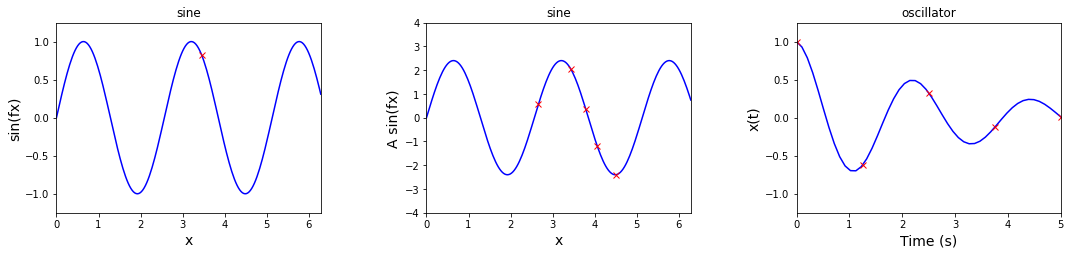

In [5]:
import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt
import random
%matplotlib inline

fig, axs = plt.subplots(1, 3, figsize=(18, 3.5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Plot sine
f = 2.45
x_sample = np.linspace(0, 2*np.pi, 200)
y_in = np.sin(f * x_sample)
x_meas_interval = [0, 2*np.pi]

OUTPUT_NODES = 1
x_meas = np.reshape(np.random.rand(OUTPUT_NODES) * (x_meas_interval[1] - x_meas_interval[0]) + x_meas_interval[0], [OUTPUT_NODES])
y_out = np.array([np.sin(f * x) for x in x_meas])

print(f"Frequency: f = {f:.03f}")
print(f"x_meas: {x_meas}")
print(f"y_out: {y_out}")

plt.subplot(1, 3, 1)
plt.title('sine')
plt.plot(x_sample, y_in, 'b'); # Ground truth
plt.plot(x_meas, y_out, 'rx') # red x
plt.xlabel('x', fontsize=14);
plt.ylabel('sin(fx)', fontsize=14);
plt.xlim([0, 2*np.pi]);
plt.ylim([-1.25, 1.25]);

# Plot sine Af
f = 2.45
A = 2.4
x_sample = np.linspace(0, 2*np.pi, 200)
y_in = A*np.sin(f * x_sample)
x_meas_interval = [0, 2*np.pi]

OUTPUT_NODES = 5
x_meas = np.reshape(np.random.rand(OUTPUT_NODES) * (x_meas_interval[1] - x_meas_interval[0]) + x_meas_interval[0], [OUTPUT_NODES])
y_out = np.array([A*np.sin(f * x) for x in x_meas])

print(f"Frequency: f = {f:.03f}, Amplitude: A = {A:.03f}")
print(f"x_meas: {x_meas}")
print(f"y_out: {y_out}")

plt.subplot(1, 3, 2)
plt.title('sine')
plt.plot(x_sample, y_in, 'b'); # Ground truth
plt.plot(x_meas, y_out, 'rx') # red x
plt.xlabel('x', fontsize=14);
plt.ylabel('A sin(fx)', fontsize=14);
plt.xlim([0, 2*np.pi]);
plt.ylim([-4, 4]);

# Plot damped harmonic oscillator
k = 8.04
b = 0.64
t_sample = np.linspace(0, 5, 50)
y_in = oscillator(k, b, t_sample)

OUTPUT_NODES = 5
t_meas = np.linspace(0, 5, OUTPUT_NODES)
y_out = oscillator(k, b, t_meas)

print(f"Parameters: k = {k:.03f}, b = {b:.03f}")
print(f"t_meas: {x_meas}")
print(f"y_out: {y_out}")

plt.subplot(1, 3, 3)
plt.title('oscillator')
plt.plot(t_sample, y_in, 'b'); # Ground truth
plt.plot(t_meas, y_out, 'rx') # red x
plt.xlabel('Time (s)', fontsize=14);
plt.ylabel('x(t)', fontsize=14);
plt.xlim([0, 5]);
plt.ylim([-1.25, 1.25]);

In [6]:
import proplot
import seaborn as sns

# see https://seaborn.pydata.org/tutorial/color_palettes.html
# NASA blog: https://earthobservatory.nasa.gov/blogs/elegantfigures/2013/08/05/subtleties-of-color-part-1-of-6/
#choose the seaborn plot style as a style base
sns.set_style("ticks") #options are darkgrid, whitegrid, dark, white, ticks

colorlist = [ 'royalblue',   'coral', 'goldenrod' , 'cloudy blue'] 
hex_colorlist = ["#0504aa",  "#fc5a50",  "#f9bc08", "#acc2d9"]

sns.set_palette(sns.color_palette(hex_colorlist))

RGB_bone_color_1 = [218 / 255, 229 / 255, 230 / 255]
RGB_bone_color_2 = [173  / 255, 198 / 255, 198 / 255] 
RGB_bone_color_3 = [119 / 255, 131 / 255, 147 / 255] 

RGB_color_list = [
                  [0, 0, 128/255], #navy blue
                  [231/255, 52/255, 76/255], #pinkish_red
                  [1, 99/255, 0], #orange
                  [1, 163/255, 71/255], #light_orange
                  [1, 197/255, 139/255], #white_orange 
                  [180/255, 82/255, 102/255] # deep_rose
]

hex_nice_blue = '#107ab0'

labelsize = 8
fontsize = 8

/usr/local/lib/python3.7/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


In [7]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc'

Frequency: f = 2.450
x_meas: [3.44829694]
y_out: [0.82851496]

Frequency: f = 2.600, Amplitude: A = 2.400
x_meas: [4.49366732 3.78727399 3.42360201 2.66190161 4.0582724 ]
y_out: [-1.85410194 -0.98330023  1.1996133   1.42895124 -2.16722952]

Parameters: k = 8.040, b = 0.640
t_meas: [4.49366732 3.78727399 3.42360201 2.66190161 4.0582724 ]
y_out: [ 1.         -0.62247127  0.325612   -0.12567385  0.01014983]


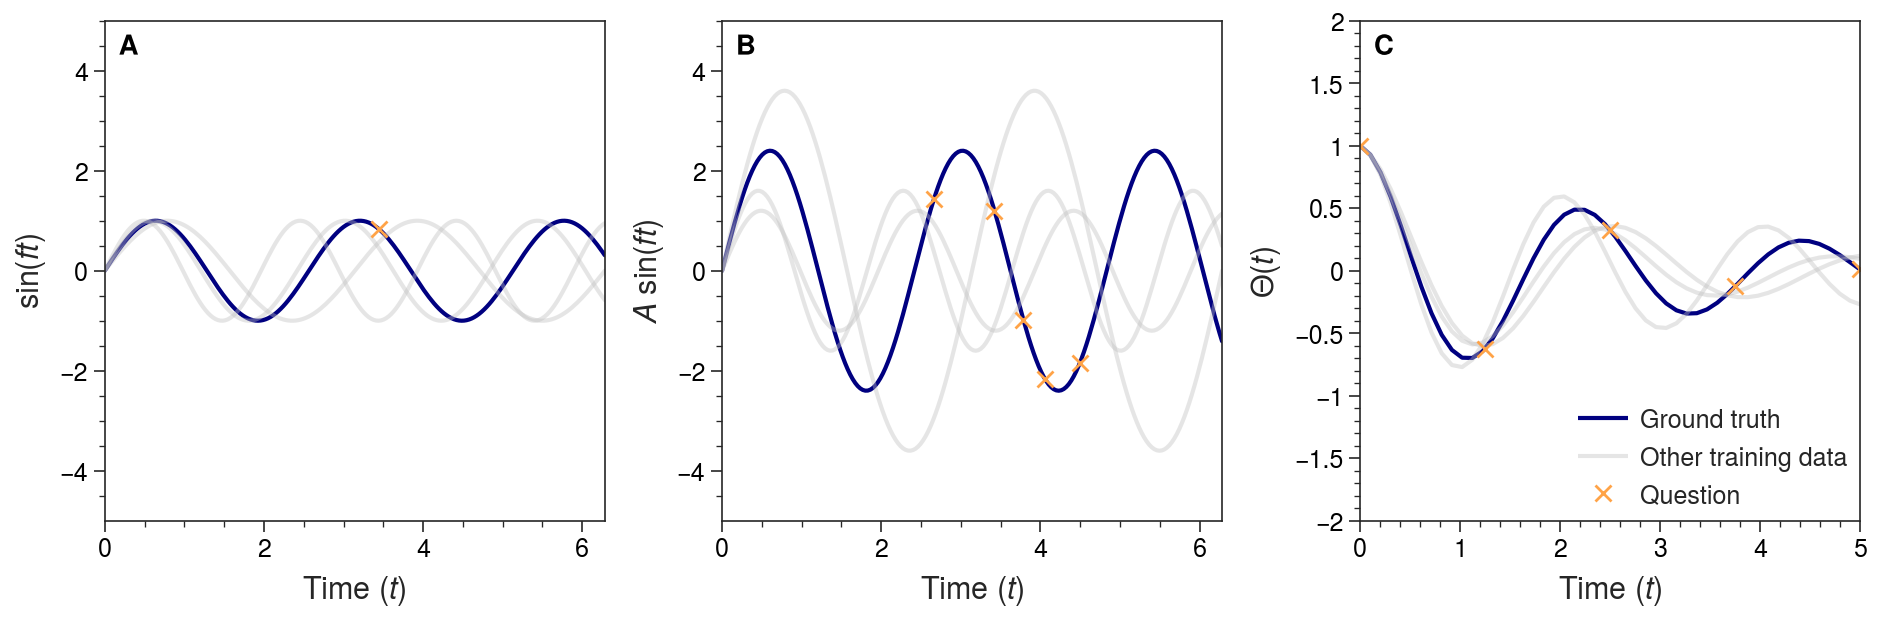

In [8]:
font = 'TeX Gyre Heros'
fontsize = 11
proplot.rc['font.sans-serif'] = font

fig, axs = proplot.subplots(
        [[1, 2, 3]], sharex=False, sharey=False, 
    ); # the array provides a picture with 1 pixel is first ax etc...

#general formatting for all axes
axs.format(abc='A', abcloc='ul',
        titleweight='bold',
        titleloc='uc', 
        fontfamily='sans-serif');


RGB_color_list = [
                  [0, 0, 128/255], #navy blue
                  [231/255, 52/255, 76/255], #pinkish_red
                  [1, 99/255, 0], #orange
                  [1, 163/255, 71/255], #light_orange
                  [1, 197/255, 139/255], #white_orange 
                  [180/255, 82/255, 102/255], # deep_rose
                  [192/255, 192/255, 192/255] # grey
]

# Plot sine
f = 2.45
f_grey = [2.0, 2.6, 3.2]
x_sample = np.linspace(0, 2*np.pi, 200)
y_in = np.sin(f * x_sample)
y_grey = [np.sin(f_i * x_sample) for f_i in f_grey]
x_meas_interval = [0, 2*np.pi]

OUTPUT_NODES = 1
np.random.seed(0)
x_meas = np.reshape(np.random.rand(OUTPUT_NODES) * (x_meas_interval[1] - x_meas_interval[0]) + x_meas_interval[0], [OUTPUT_NODES])
y_out = np.array([np.sin(f * x) for x in x_meas])

print(f"Frequency: f = {f:.03f}")
print(f"x_meas: {x_meas}")
print(f"y_out: {y_out}")

axs[0].plot(x_sample, y_in, color=RGB_color_list[0], label="Ground truth", alpha=1); # Ground truth
# grey other training data
for i, line in enumerate(y_grey):
  if i == 0:
    label = 'Other training data'
  else:
    label = ''
  axs[0].plot(x_sample, line, color=RGB_color_list[6], label=label, alpha=0.4) 
axs[0].plot(x_meas, y_out, color=RGB_color_list[3], marker='x', linestyle='', label='Question') # gold x_meas question

#axs[0].legend(loc='lower right', ncol=1, frameon=False, borderpad = 0.5, fontsize=8)
axs[0].set_ylim([-5, 5]);
#axs[0].set_title('sine - 1 variable');
axs[0].set_xlabel(r'Time ($\mathit{t}$)', fontsize=fontsize);
axs[0].set_ylabel(r'sin($\mathit{f} \mathit{t}$)', fontsize=fontsize);

# Plot sine Af
f = 2.6
A = 2.4
f_grey = [2.0, 3.2, 3.45]
A_grey = [3.6, 1.2, 1.6]
x_sample = np.linspace(0, 2*np.pi, 200)
y_in = A*np.sin(f * x_sample)
y_grey = [A_i*np.sin(f_i * x_sample) for f_i, A_i in zip(f_grey, A_grey)]
x_meas_interval = [0, 2*np.pi]

OUTPUT_NODES = 5
x_meas = np.reshape(np.random.rand(OUTPUT_NODES) * (x_meas_interval[1] - x_meas_interval[0]) + x_meas_interval[0], [OUTPUT_NODES])
y_out = np.array([A*np.sin(f * x) for x in x_meas])

print(f"\nFrequency: f = {f:.03f}, Amplitude: A = {A:.03f}")
print(f"x_meas: {x_meas}")
print(f"y_out: {y_out}")

axs[1].plot(x_sample, y_in, color=RGB_color_list[0], label="Ground truth", alpha=1); # Ground truth
# grey other training data
for i, line in enumerate(y_grey):
  if i == 0:
    label = 'Other training data'
  else:
    label = ''
  axs[1].plot(x_sample, line, color=RGB_color_list[6], label=label, alpha=0.4) 
axs[1].plot(x_meas, y_out, color=RGB_color_list[3], marker='x', linestyle='', label='Question') # gold x_meas question
#axs[1].legend(loc='lower right', ncol=1, frameon=False, borderpad = 0.5, fontsize=8)
axs[1].set_ylim([-5, 5]);
axs[1].set_xlim([0, 2*np.pi])
#axs[1].set_title('sine - 2 variables');
axs[1].set_xlabel(r'Time ($\mathit{t}$)', fontsize=fontsize);
axs[1].set_ylabel(r'$\mathit{A}$ sin($\mathit{f} \mathit{t}$)', fontsize=fontsize);

# Plot damped harmonic oscillator
k = 8.04
b = 0.64
k_grey = [6, 7, 9.6]
b_grey = [0.8, 0.9, 0.51]
t_sample = np.linspace(0, 5, 50)
y_in = oscillator(k, b, t_sample)
y_grey = [oscillator(k_i, b_i, t_sample) for k_i, b_i in zip(k_grey, b_grey)]

OUTPUT_NODES = 5
t_meas = np.linspace(0, 5, OUTPUT_NODES)
y_out = oscillator(k, b, t_meas)

print(f"\nParameters: k = {k:.03f}, b = {b:.03f}")
print(f"t_meas: {x_meas}")
print(f"y_out: {y_out}")

axs[2].plot(t_sample, y_in, color=RGB_color_list[0], label="Ground truth", alpha=1); # Ground truth
# grey other training data
for i, line in enumerate(y_grey):
  if i == 0:
    label = 'Other training data'
  else:
    label = ''
  axs[2].plot(t_sample, line, color=RGB_color_list[6], label=label, alpha=0.4) 
axs[2].plot(t_meas, y_out, color=RGB_color_list[3], marker='x', linestyle='', label='Question') # gold x_meas question
axs[2].legend(loc='lower right', ncol=1, frameon=False, borderpad = 0.5, fontsize=fontsize)
axs[2].set_ylim([-2, 2]);
#axs[2].set_title('oscillator');
#axs[2].set_xlabel('Time (s)', fontsize=fontsize);
axs[2].set_xlabel(r'Time ($\mathit{t}$)', fontsize=fontsize);
axs[2].set_ylabel(r'$\Theta(\mathit{t})$', fontsize=fontsize);

savename = 'figure_2.png'
plt.savefig(path_paper + 'figs/' + savename)

## Figure 3

In [9]:
# Getting all data
import pandas as pd

# Load sine random
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 random/"
sine_random = pd.read_csv(path + "gifs/" + experiment_path + "Training results.csv", index_col=0)
sine_random = sine_random[sine_random["Epochs"]==600]
sine_random_active = [1, 1, 1, 3, 4, 2, 1, 0]

# Load sine fixed
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 fixed points/"
sine_fixed = pd.read_csv(path + "gifs/" + experiment_path + "Training results.csv", index_col=0).sort_values(by=['Output nodes', 'Epochs']) # we have output_nodes = 1 double due to seed
sine_fixed = sine_fixed[sine_fixed["Epochs"]==120]
sine_fixed_active = [1, 2, 3, 4, 4, 4, 3, 5]

# Load damped harmonic oscillator random
oscillator_random = pd.read_csv(path_osc + "data/simple_table_random_swish.csv", index_col=0)
oscillator_random_mean = oscillator_random.groupby(['Output nodes']).mean()[['Test MAE', 'KL div', 'Active Units']]
oscillator_random_std = oscillator_random.groupby(['Output nodes']).std()[['Test MAE', 'KL div', 'Active Units']]
oscillator_random_active = [2, 2, 2, 2, 1, 1]

# Load damped harmonic oscillator fixed
oscillator_fixed = pd.read_csv(path_osc + "data/simple_table_fixed_swish.csv", index_col=0)
oscillator_fixed_mean = oscillator_fixed.groupby(['Output nodes']).mean()[['Test MAE', 'KL div', 'Active Units']]
oscillator_fixed_std = oscillator_fixed.groupby(['Output nodes']).std()[['Test MAE', 'KL div', 'Active Units']]
oscillator_fixed_active = [1, 2, 2, 2, 2, 2]

# Load sine Af random
path_af = "/content/drive/My Drive/PhD year 1/BETA Af - dataset 2/"
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 random/"
sine_af_random = pd.read_csv(path_af + "gifs/" + experiment_path + "Training results.csv", index_col=0)
sine_af_random = sine_af_random[sine_af_random["Epochs"]==600]
sine_af_random_active = [2, 2, 0, 10, 10, 0, 0, 2]

# Load sine Af fixed 
# Output nodes 1-5 and 25-200 (beta=0.001)
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 fixed points/"
sine_af_fixed_full = pd.read_csv(path_af + "gifs/" + experiment_path + "Training results.csv", index_col=0)
sine_af_fixed_1_5 = sine_af_fixed_full[sine_af_fixed_full["Epochs"]==600][sine_af_fixed_full['Output nodes'] < 10]
sine_af_fixed_25_200 = sine_af_fixed_full[sine_af_fixed_full["Epochs"]==600][sine_af_fixed_full['Output nodes'] > 10]
sine_af_fixed_active_1_5 = [1, 2, 4]
sine_af_fixed_active_25_200 = [4, 2, 4, 4]

# Output nodes 10 (beta=0.01)
# Output nodes 1-5 and 25-200 (beta=0.001)
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 fixed points 0.01/"
sine_af_fixed_full = pd.read_csv(path_af + "gifs/" + experiment_path + "Training results.csv", index_col=0)
sine_af_fixed_10 = sine_af_fixed_full[sine_af_fixed_full["Epochs"]==600][sine_af_fixed_full['Output nodes'] == 10]
sine_af_fixed_active_10 = [5]

# Load sine Af random
# Output nodes 1-5 (beta=0.005)
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 random 0.005/"
sine_af_random_full = pd.read_csv(path_af + "gifs/" + experiment_path + "Training results.csv", index_col=0)
sine_af_random_1_5 = sine_af_random_full[sine_af_random_full['Epochs']==600][sine_af_random_full['Output nodes'] <= 5] 
sine_af_random_active_1_5 = [2, 2, 2]

# Output nodes 10-200 (beta=0.01)
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 random 0.01/"
sine_af_random_full = pd.read_csv(path_af + "gifs/" + experiment_path + "Training results.csv", index_col=0)
#sine_af_random_10_200 = sine_af_random_full[sine_af_random_full['Epochs']==600][sine_af_random_full['Output nodes'] > 5] 
sine_af_random_10_200 = sine_af_random_full.iloc[[23, 29, 34, 41, 47]]
sine_af_random_active_10_200 = [3, 3, 3, 0, 0]

print(sine_af_fixed_1_5)
print(sine_af_fixed_10)
print(sine_af_fixed_25_200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


     BETA  Total loss  Reconstruction (MSE)    KL div  Test MAE  Epochs  \
5   0.001    0.004772              0.000564  4.207345  0.020099     600   
11  0.001    0.008085              0.001110  6.974357  0.026265     600   
17  0.001    0.008794              0.001050  7.744535  0.024132     600   

   Training time Activation  Batch size  \
5    36 mins 13s      swish         100   
11   36 mins 15s      swish         100   
17   37 mins 56s      swish         100   

                                            Saved as  Seed  Output nodes  
5   BETA=0.001_epochs=600_seed=0_output_nodes=1.hdf5     0             1  
11  BETA=0.001_epochs=600_seed=0_output_nodes=2.hdf5     0             2  
17  BETA=0.001_epochs=600_seed=0_output_nodes=5.hdf5     0             5  
   BETA  Total loss  Reconstruction (MSE)    KL div  Test MAE  Epochs  \
5  0.01      0.0739              0.011831  6.206842  0.078208     600   

  Training time Activation  Batch size  \
5   32 mins 49s      swish         10

In [10]:
sine_random

,BETA,Total loss,Reconstruction (MSE),KL div,Test MAE,Epochs,Training time,Activation,Batch size,Saved as,Seed,Output nodes
5,0.001,0.005262,0.000968,4.294324,0.020633,600,30 mins 20s,swish,100,BETA=0.001_epochs=600_seed=0_output_nodes=1.hdf5,0,1
11,0.001,0.005324,0.000924,4.399654,0.024140,600,28 mins 55s,swish,100,BETA=0.001_epochs=600_seed=0_output_nodes=2.hdf5,0,2
17,0.001,0.005390,0.001064,4.326401,0.023944,600,28 mins 56s,swish,100,BETA=0.001_epochs=600_seed=0_output_nodes=5.hdf5,0,5
23,0.001,0.015440,0.007309,8.131285,0.056328,600,28 mins 55s,swish,100,BETA=0.001_epochs=600_seed=0_output_nodes=10.hdf5,0,10
29,0.001,0.197251,0.186418,10.833118,0.314567,600,30 mins 9s,swish,100,BETA=0.001_epochs=600_seed=0_output_nodes=25.hdf5,0,25
35,0.001,0.372659,0.367629,5.030742,0.501183,600,30 mins 6s,swish,100,BETA=0.001_epochs=600_seed=0_output_nodes=50.hdf5,0,50
41,0.001,0.481819,0.480367,1.451985,0.613302,600,30 mins 5s,swish,100,BETA=0.001_epochs=600_seed=0_output_nodes=100....,0,100
47,0.001,0.499153,0.499152,0.001683,0.629126,600,49 mins 42s,swish,100,BETA=0.001_epochs=600_seed=0_output_nodes=200....,0,200


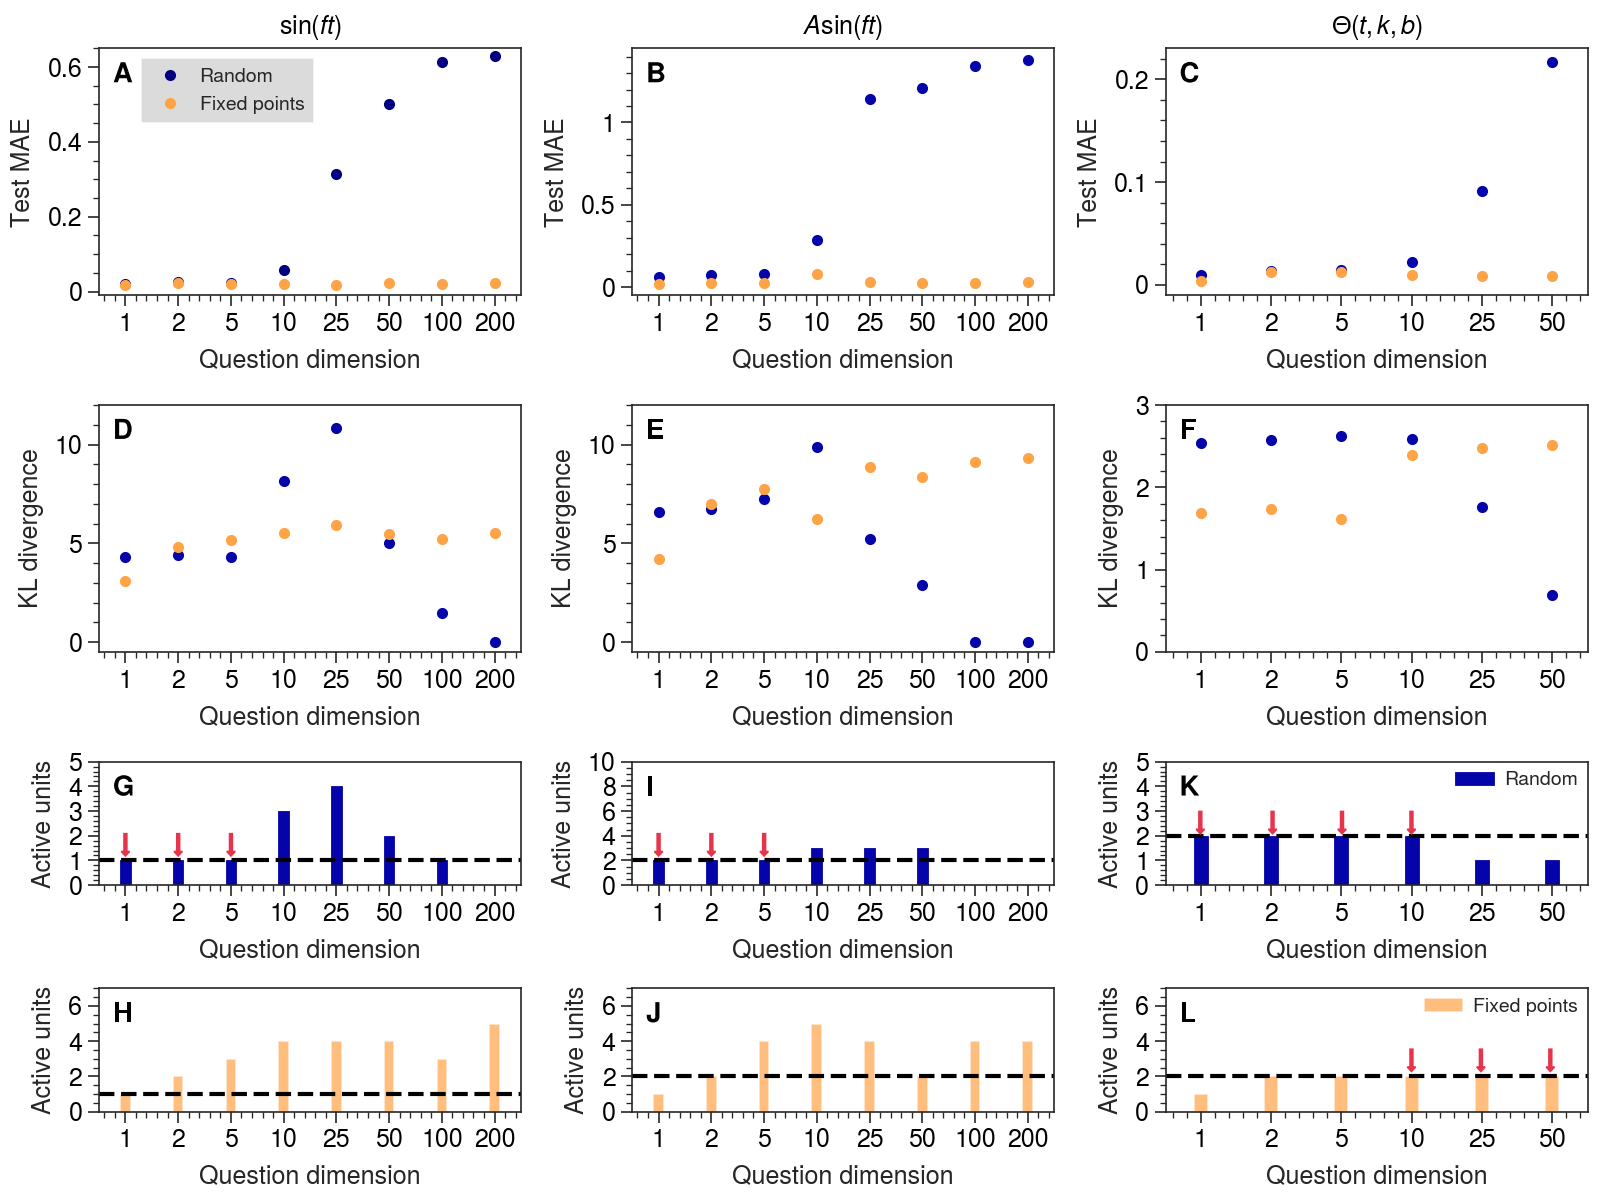

In [11]:
# attempt 5
import matplotlib.pyplot as plt

RGB_color_list = [
                  [0, 0, 128/255], #navy blue
                  [231/255, 52/255, 76/255], #pinkish_red
                  [1, 99/255, 0], #orange
                  [1, 163/255, 71/255], #light_orange
                  [1, 197/255, 139/255], #white_orange 
                  [180/255, 82/255, 102/255] # deep_rose
]

fontsize = 9
color_1 = RGB_color_list[0]
color_2 = RGB_color_list[3]
proplot.rc['font.sans-serif'] = 'TeX Gyre Heros'
proplot.rc['legend.facecolor'] = 'lightgrey'
proplot.rc['legend.fontsize'] = 7

fig, axs = proplot.subplots(
        [[1, 1, 2, 2, 3, 3],
         [1, 1, 2, 2, 3, 3], 
         [4, 4, 5, 5, 6, 6], 
         [4, 4, 5, 5, 6, 6], 
         [7, 7, 9, 9, 11, 11],
         [8, 8, 10, 10, 12, 12]], sharex=False, sharey=False, figsize=(8, 6),
    ); # the array provides a picture with 1 pixel is first ax etc...

#general formatting for all axes
axs.format(abc='A', abcloc='ul',
        titleweight='bold',
        titleloc='uc');

RGB_color_list = [
                  [0, 0, 128/255], #navy blue
                  [231/255, 52/255, 76/255], #pinkish_red
                  [1, 99/255, 0], #orange
                  [1, 163/255, 71/255], #light_orange
                  [1, 197/255, 139/255], #white_orange 
                  [180/255, 82/255, 102/255] # deep_rose
]

# Sine plot Test MAE
axs[0].plot(range(8), sine_random['Test MAE'], color=color_1, marker='.', linestyle='', label='Random')
axs[0].plot(range(8), sine_fixed['Test MAE'], color=color_2, marker='.', linestyle='', label='Fixed points');
axs[0].set_title(r'$sin(\mathit{f} \mathit{t})$', fontsize=fontsize)

axs[0].set_xticks(ticks=range(8))
axs[0].set_xticklabels(sine_fixed['Output nodes']) 
axs[0].set_ylabel('Test MAE', fontsize=fontsize)
axs[0].set_xlabel('Question dimension', fontsize=fontsize)
axs[0].set_ylim([-0.01, 0.650])
axs[0].set_xlim([-0.5, 7.5])
axs[0].legend(loc='upper left', ncol=1, borderpad = 0.5, fontsize=fontsize-2, edgecolor='white',
              bbox_to_anchor=(0.10, 0.86, 0.35, 0.10)); # x, y, width, height


# Sine af plot Test MAE
axs[1].plot(range(8), pd.concat([sine_af_random_1_5['Test MAE'], sine_af_random_10_200['Test MAE']]), marker='.', linestyle='', label='Random');
axs[1].plot(range(8), pd.concat([sine_af_fixed_1_5['Test MAE'], sine_af_fixed_10['Test MAE'], sine_af_fixed_25_200['Test MAE']]),
                                color=color_2, marker='.', linestyle='', label='Fixed points');
axs[1].set_title(r'$\mathit{A} sin(\mathit{f} \mathit{t})$', fontsize=fontsize)

axs[1].set_xticks(ticks=range(8))
axs[1].set_xticklabels(sine_af_random['Output nodes']) 
axs[1].set_ylabel('Test MAE', fontsize=fontsize)
axs[1].set_xlabel('Question dimension', fontsize=fontsize)
axs[1].set_ylim([-0.05, 1.45])
axs[1].set_xlim([-0.5, 7.5])
#axs[1].legend(loc='upper right', frameon=False);

# Oscillator plot Test MAE
j = 2
axs[j].plot(range(6), oscillator_random_mean['Test MAE'], 
            label='Random', 
            marker='.', linestyle='');
axs[j].plot(range(6), oscillator_fixed_mean['Test MAE'], 
            label='Fixed points', color=color_2,
            marker='.', linestyle='');
axs[j].set_title(r'$\Theta(\mathit{t}, \mathit{k}, \mathit{b})$', fontsize=fontsize)

axs[j].set_xticks(ticks=range(6))
axs[j].set_xticklabels([1, 2, 5, 10, 25, 50])
axs[j].set_yticks(ticks=[0, 0.1, 0.2])
axs[j].set_ylabel('Test MAE', fontsize=fontsize)
axs[j].set_xlabel('Question dimension', fontsize=fontsize)
axs[j].set_ylim([-0.01, 0.23])
axs[j].set_xlim([-0.5, 5.5])
#axs[2].legend(loc='upper right', fontsize=8, frameon=False);

# Sine plot KL divergence
axs[3].plot(range(8), sine_random['KL div'], '.', label='Random');
axs[3].plot(range(8), sine_fixed['KL div'], color=color_2, marker='.', linestyle='', label='Fixed points');
axs[3].set_xticks(ticks=range(8))
axs[3].set_xticklabels(sine_random['Output nodes']) 
axs[3].set_ylabel('KL divergence', fontsize=fontsize)
axs[3].set_xlabel('Question dimension', fontsize=fontsize)
axs[3].set_ylim([-0.5, 12])
axs[3].set_xlim([-0.5, 7.5])

# Sine af plot KL divergence
axs[4].plot(range(8), pd.concat([sine_af_random_1_5['KL div'], sine_af_random_10_200['KL div']]), '.', label='Random');
axs[4].plot(range(8), pd.concat([sine_af_fixed_1_5['KL div'], sine_af_fixed_10['KL div'], sine_af_fixed_25_200['KL div']]),
            color=color_2, marker='.', linestyle='', label='Fixed points');
axs[4].set_xticks(ticks=range(8))
axs[4].set_xticklabels(sine_af_random['Output nodes']) 
axs[4].set_ylabel('KL divergence', fontsize=fontsize)
axs[4].set_xlabel('Question dimension', fontsize=fontsize)
axs[4].set_ylim([-0.5, 12])
axs[4].set_xlim([-0.5, 7.5])

# Oscillator plot KL divergence
axs[5].plot(range(6), oscillator_random_mean['KL div'], label='Random',
             marker='.', linestyle='');
axs[5].plot(range(6), oscillator_fixed_mean['KL div'], color=color_2, label='Fixed points',
             marker='.', linestyle='');
axs[5].set_xticks(ticks=range(6))
axs[5].set_xticklabels([1, 2, 5, 10, 25, 50])
axs[5].set_ylabel('KL divergence', fontsize=fontsize)
axs[5].set_xlabel('Question dimension', fontsize=fontsize)
axs[5].set_ylim([0, 3])
axs[5].set_xlim([-0.5, 5.5])

# Sine plot active dimensions random
j = 6
width = 0.20
axs[j].bar(np.array(range(8)), sine_random_active, width, label='Random')
axs[j].axhline(1, color='k', linestyle='--')
axs[j].set_xticks(ticks=range(8))
axs[j].set_xticklabels([1, 2, 5, 10, 25, 50, 100, 200])
axs[j].set_yticks(ticks=[0, 1, 2, 3, 4, 5])
axs[j].set_xlabel('Question dimension', fontsize=fontsize)
axs[j].set_ylabel('Active units', fontsize=fontsize)
axs[j].set_xlim([-0.5, 7.5])

from matplotlib.patches import Circle, Arrow
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea

ada = AnchoredDrawingArea(60, 20, 0, -3,
                          loc='lower left', pad=0., frameon=False)
p1 = Arrow(6, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p1)
p2 = Arrow(25, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p2)
p3 = Arrow(44, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p3)

axs[j].add_artist(ada)

# Sine plot active dimensions fixed
j = 7
width = 0.20
axs[j].bar(np.array(range(8)), sine_fixed_active, width, color=color_2, alpha=0.7, label='Fixed points');
axs[j].axhline(1, color='k', linestyle='--')
axs[j].set_xticks(ticks=range(8))
axs[j].set_xticklabels([1, 2, 5, 10, 25, 50, 100, 200])
axs[j].set_yticks(ticks=[0, 2, 4, 6])
axs[j].set_xlabel('Question dimension', fontsize=fontsize)
axs[j].set_ylabel('Active units', fontsize=fontsize)
axs[j].set_xlim([-0.5, 7.5])
axs[j].set_ylim([0, 7])

# Sine af plot active dimensions random
j = 8
axs[j].bar(np.array(range(8)), sine_af_random_active_1_5 + sine_af_random_active_10_200, width, label='Random')
axs[j].axhline(2, color='k', linestyle='--')
axs[j].set_xticks(ticks=range(8))
axs[j].set_xticklabels([1, 2, 5, 10, 25, 50, 100, 200])
axs[j].set_yticks(ticks=[0, 2, 4, 6, 8, 10])
axs[j].set_xlabel('Question dimension', fontsize=fontsize)
axs[j].set_ylabel('Active units', fontsize=fontsize)
axs[j].set_xlim([-0.5, 7.5])

ada = AnchoredDrawingArea(60, 20, 0, -3,
                          loc='lower left', pad=0., frameon=False)
p1 = Arrow(6, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p1)
p2 = Arrow(25, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p2)
p3 = Arrow(44, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p3)

axs[j].add_artist(ada)

# Sine af plot active dimensions fixed
j = 9
axs[j].bar(np.array(range(8)), sine_af_fixed_active_1_5 + sine_af_fixed_active_10 + sine_af_fixed_active_25_200,
           width, color=color_2, alpha=0.7, label='Fixed points');
axs[j].axhline(2, color='k', linestyle='--')
axs[j].set_xticks(ticks=range(8))
axs[j].set_xticklabels([1, 2, 5, 10, 25, 50, 100, 200])
axs[j].set_yticks(ticks=[0, 2, 4, 6])
axs[j].set_xlabel('Question dimension', fontsize=fontsize)
axs[j].set_ylabel('Active units', fontsize=fontsize)
axs[j].set_xlim([-0.5, 7.5])
axs[j].set_ylim([0, 7])

# Oscillator plot active dimensions random
j = 10
width = 0.20
axs[j].bar(np.array(range(6)), oscillator_random_active, width, label='Random');
axs[j].axhline(2, color='k', linestyle='--')
axs[j].set_xticks(ticks=range(6))
axs[j].set_xticklabels([1, 2, 5, 10, 25, 50])
axs[j].set_yticks(ticks=[0, 1, 2, 3, 4, 5])
axs[j].set_xlabel('Question dimension', fontsize=fontsize)
axs[j].set_ylabel('Active units', fontsize=fontsize)
axs[j].set_xlim([-0.5, 5.5])
axs[j].legend(loc='upper right', frameon=False);

ada = AnchoredDrawingArea(60, 20, 0, 5,
                          loc='lower left', pad=0., frameon=False)
p1 = Arrow(9, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p1)
p2 = Arrow(35, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p2)
p3 = Arrow(60, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p3)
p4 = Arrow(85, 18, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p4)

axs[j].add_artist(ada)

# Oscillator plot active dimensions fixed
j = 11
axs[j].bar(np.array(range(6)), oscillator_fixed_active, width, color=color_2, alpha=0.7, label='Fixed points');
axs[j].axhline(2, color='k', linestyle='--')
axs[j].set_xticks(ticks=range(6))
axs[j].set_xticklabels([1, 2, 5, 10, 25, 50])
axs[j].set_yticks(ticks=[0, 2, 4, 6])
axs[j].set_xlabel('Question dimension', fontsize=fontsize)
axs[j].set_ylabel('Active units', fontsize=fontsize)
axs[j].set_xlim([-0.5, 5.5])
axs[j].set_ylim([0, 7])
axs[j].legend(loc='upper right', frameon=False);

ada = AnchoredDrawingArea(60, 20, 0, 5,
                          loc='lower left', pad=0., frameon=False)
p1 = Arrow(85, 14, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p1)
p2 = Arrow(110, 14, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p2)
p3 = Arrow(135, 14, 0, -8, fc=RGB_color_list[1], ec=RGB_color_list[1], width=5)
ada.drawing_area.add_artist(p3)

axs[j].add_artist(ada)

savename = 'figure_3.png'
plt.savefig(path_paper + 'figs/' + savename)

## Figure 4

In [12]:
# load in data
import numpy as np

# good correlation for f: random 5 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 random/"
correlation_f_good = np.load(path + "gifs/" + experiment_path + "correlation_random_output_nodes=5.npy")
print(f"Shape: correlation_f_good: {correlation_f_good.shape}")
f_good = correlation_f_good[:, 0]
mean_good = correlation_f_good[:, 1:]
print(f"Shape f_good: {f_good.shape}")
print(f"Shape mean_good: {mean_good.shape}")

# bad correlation for f: fixed 25 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 fixed points/"
correlation_f_bad = np.load(path + "gifs/" + experiment_path + "correlation_fixed_output_nodes=25.npy")
print(f"\nShape: correlation_f_bad: {correlation_f_bad.shape}")
f_bad = correlation_f_bad[:, 0]
mean_bad = correlation_f_bad[:, 1:]
print(f"Shape f_bad: {f_bad.shape}")
print(f"Shape mean_bad: {mean_bad.shape}")

Shape: correlation_f_good: (10000, 11)
Shape f_good: (10000,)
Shape mean_good: (10000, 10)

Shape: correlation_f_bad: (10000, 11)
Shape f_bad: (10000,)
Shape mean_bad: (10000, 10)


Good correlation:
Latent dimension 9 is active!
There are 1 active latent dimensions!

Bad correlation: 
Latent dimension 5 is active!
Latent dimension 6 is active!
Latent dimension 7 is active!
Latent dimension 8 is active!
There are 4 active latent dimensions!


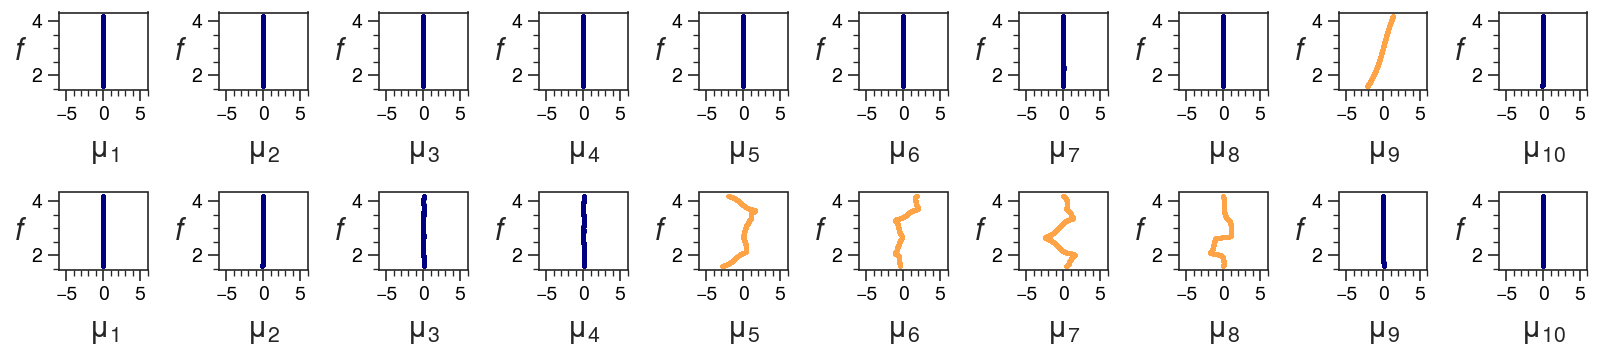

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import proplot

fontsize = 11
color_1 = RGB_color_list[0]
color_2 = RGB_color_list[3]

fig, axs = proplot.subplots(
        [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
         [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]], sharex=False, sharey=False, figsize=(8, 1.8)
    ); # the array provides a picture with 1 pixel is first ax etc...

axs.format(abc=False, #abcloc='ul',
        titleweight='bold',
        titleloc='uc', fontsize=7);

# Good correlation
for i in range(10):
  if i == (9-1):
    axs[i].scatter(x=mean_good[:, i], y=f_good, marker='.', s=2, color=color_2)
  else:
    axs[i].scatter(x=mean_good[:, i], y=f_good, marker='.', s=2, color=color_1)
  axs[i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[i].set_ylabel(r"$\mathit{f}$", fontsize=fontsize, rotation='horizontal', y=0.30)

# Compute Activated Units (AU) using cov(mu) for good correlation
active_dims = 0
treshold = 0.01
print("Good correlation:")
for i in range(10):
  cov_mu = np.cov(mean_good[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!")

# Bad correlation
for i in range(10):
  j = i + 10
  if i in [5-1, 6-1, 7-1, 8-1]:
    axs[j].scatter(x=mean_bad[:, i], y=f_bad, marker='.', s=2, color=color_2)
  else:
    axs[j].scatter(x=mean_bad[:, i], y=f_bad, marker='.', s=2, color=color_1)
  axs[j].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[j].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[j].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[j].set_ylabel(r"$\mathit{f}$", fontsize=fontsize, rotation='horizontal', y=0.30)

# Compute Activated Units (AU) using cov(mu) for bad correlation
active_dims = 0
treshold = 0.01
print("\nBad correlation: ")
for i in range(10):
  cov_mu = np.cov(mean_bad[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!")

savename = 'figure_4.png'
plt.savefig(path_paper + 'figs/' + savename)

## Figure 5

In [14]:
# Latent space for Af: C1 and C2
# load in data
import numpy as np

# correlation for C1 and C2: random 5 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 C1 C2 random 0.001/"
correlation_C1_C2 = np.load(path_af + "gifs/" + experiment_path + "correlation_random_output_nodes=5.npy")
print(f"Shape: correlation_C1_C2: {correlation_C1_C2.shape}")
C1 = correlation_C1_C2[:, 0]
C2 = correlation_C1_C2[:, 1]
f = correlation_C1_C2[:, 2]
A = correlation_C1_C2[:, 3]
mean_C1_C2 = correlation_C1_C2[:, 4:]
print(f"Shape C1: {C1.shape}")
print(f"Shape C2: {C2.shape}")
print(f"Shape f: {f.shape}")
print(f"Shape A: {A.shape}")
print(f"Shape mean_good: {mean_C1_C2.shape}")

Shape: correlation_C1_C2: (10000, 14)
Shape C1: (10000,)
Shape C2: (10000,)
Shape f: (10000,)
Shape A: (10000,)
Shape mean_good: (10000, 10)


Correlations original: 
Pearson correlation dimension 8 and C1: -0.718 (p-value 0.000)
Pearson correlation dimension 8 and C2: -0.701 (p-value 0.000)

Pearson correlation dimension 9 and C1: 0.700 (p-value 0.000)
Pearson correlation dimension 9 and C2: -0.700 (p-value 0.000)

Latent dimension 8 is active!
Latent dimension 9 is active!
There are 2 active latent dimensions!

Correlations linearly transformed: 
Pearson correlation dimension 8 and f = C1 - C2 / 2: -0.014 (p-value 0.170)
Pearson correlation dimension 8 and A = C1 + C2 / 2: -0.997 (p-value 0.000)

Pearson correlation dimension 9 and f = C1 - C2 / 2: 0.997 (p-value 0.000)
Pearson correlation dimension 9 and A = C1 + C2 / 2: 0.002 (p-value 0.820)



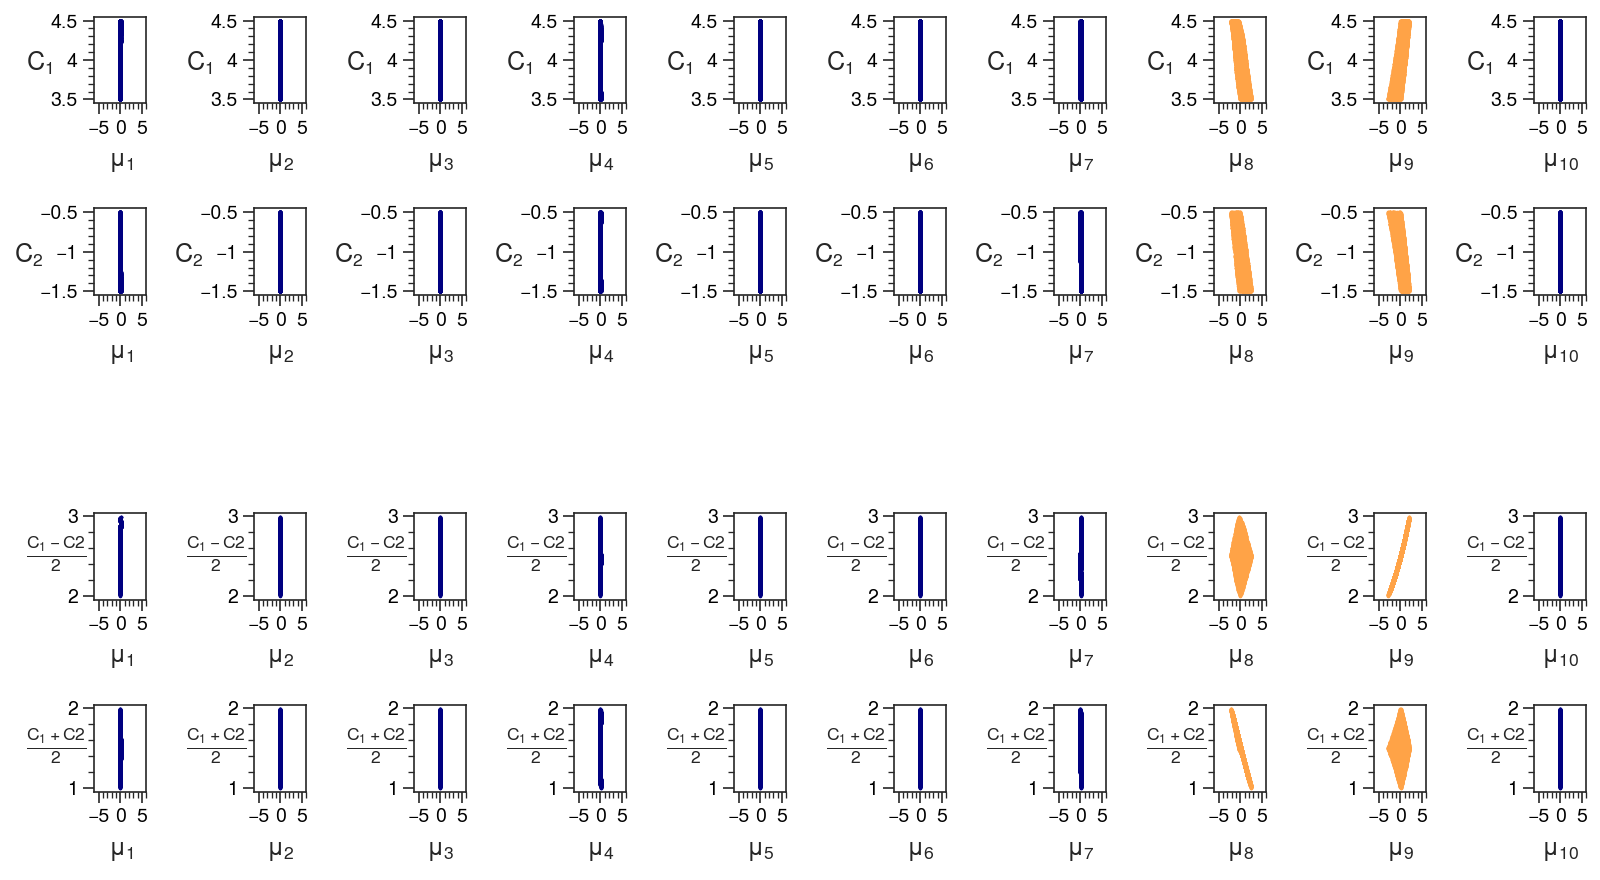

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import proplot
from scipy.stats import pearsonr

fontsize = 9
color_1 = RGB_color_list[0]
color_2 = RGB_color_list[3]

fig, axs = proplot.subplots(
        [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
         [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
         [21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
         [31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 
         [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]], sharex=False, sharey=False, figsize=(8, 4.4) # 3.5
    ); # the array provides a picture with 1 pixel is first ax etc...

axs.format(abc=False, #abcloc='ul',
        titleweight='bold',
        titleloc='uc', fontsize=7);

# For C1 and C2
# for C1
for i in range(10):
  if i in [8-1, 9-1]:
    axs[i].scatter(x=mean_C1_C2[:, i], y=C1, marker='.', s=2, color=color_2)
  else:
    axs[i].scatter(x=mean_C1_C2[:, i], y=C1, marker='.', s=2, color=color_1)
  axs[i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[i].set_ylabel(r"$C_1$", fontsize=fontsize, rotation='horizontal', y=0.30)

# for C2
for i in range(10):
  ax_i = i + 10
  if i in [8-1, 9-1]:
    axs[ax_i].scatter(x=mean_C1_C2[:, i], y=C2, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_C1_C2[:, i], y=C2, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$C_2$", fontsize=fontsize, rotation='horizontal', y=0.30)

print(f"Correlations original: ")
for i in [7, 8]:
    corr, p = pearsonr(mean_C1_C2[:, i], C1)
    print(f"Pearson correlation dimension {i+1} and C1: {corr:.3f} (p-value {p:.3f})")  
    corr, p = pearsonr(mean_C1_C2[:, i], C2)
    print(f"Pearson correlation dimension {i+1} and C2: {corr:.3f} (p-value {p:.3f})\n")

# Compute Activated Units (AU) using cov(mu) for good correlation
active_dims = 0
treshold = 0.01
for i in range(10):
  cov_mu = np.cov(mean_C1_C2[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!\n")

# hide intermediate axis
for j in range(20, 30):
  axs[j].axis('off')

# For f and A
# for f = C1 - C2 / 2
for i in range(10):
  ax_i = i + 30
  if i in [8-1, 9-1]:
    axs[ax_i].scatter(x=mean_C1_C2[:, i], y=f, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_C1_C2[:, i], y=f, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\frac{C_1 - C2}{2}$", fontsize=fontsize, rotation='horizontal', y=0.30, x=-1.2)

# for A = C1 + C2 / 2
for i in range(10):
  ax_i = i + 40
  if i in [8-1, 9-1]:
    axs[ax_i].scatter(x=mean_C1_C2[:, i], y=A, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_C1_C2[:, i], y=A, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\frac{C_1 + C2}{2}$", fontsize=fontsize, rotation='horizontal', y=0.30, x=-1.2)

print(f"Correlations linearly transformed: ")
for i in [7, 8]:
    corr, p = pearsonr(mean_C1_C2[:, i], f)
    print(f"Pearson correlation dimension {i+1} and f = C1 - C2 / 2: {corr:.3f} (p-value {p:.3f})")  
    corr, p = pearsonr(mean_C1_C2[:, i], A)
    print(f"Pearson correlation dimension {i+1} and A = C1 + C2 / 2: {corr:.3f} (p-value {p:.3f})\n")

savename = 'figure_5.png'
plt.savefig(path_paper + 'figs/' + savename)

## Figure 6

In [17]:
# Latent space for Af: D1 and D2, E1 and E2
# load in data
import numpy as np

# correlation for D1 and D2: random 5 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 D1 D2 random 0.001/"
correlation_D1_D2 = np.load(path_af + "gifs/" + experiment_path + "correlation_random_output_nodes=1.npy")
print(f"Shape: correlation_D1_D2: {correlation_D1_D2.shape}")
D1 = correlation_D1_D2[:, 0]
D2 = correlation_D1_D2[:, 1]
f = correlation_D1_D2[:, 2]
A = correlation_D1_D2[:, 3]
mean_D1_D2 = correlation_D1_D2[:, 4:]
print(f"Shape D1: {D1.shape}")
print(f"Shape D2: {D2.shape}")
print(f"Shape f: {f.shape}")
print(f"Shape A: {A.shape}")
print(f"Shape mean_good: {mean_D1_D2.shape}\n")

# correlation for E1 and E2: random 5 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 E1 E2 random 0.001/"
correlation_E1_E2 = np.load(path_af + "gifs/" + experiment_path + "correlation_random_output_nodes=5.npy")
print(f"Shape: correlation_E1_E2: {correlation_E1_E2.shape}")
E1 = correlation_E1_E2[:, 0]
E2 = correlation_E1_E2[:, 1]
f = correlation_E1_E2[:, 2]
A = correlation_E1_E2[:, 3]
mean_E1_E2 = correlation_E1_E2[:, 4:]
print(f"Shape E1: {E1.shape}")
print(f"Shape E2: {E2.shape}")
print(f"Shape f: {f.shape}")
print(f"Shape A: {A.shape}")
print(f"Shape mean_good: {mean_E1_E2.shape}")

Shape: correlation_D1_D2: (10000, 14)
Shape D1: (10000,)
Shape D2: (10000,)
Shape f: (10000,)
Shape A: (10000,)
Shape mean_good: (10000, 10)

Shape: correlation_E1_E2: (10000, 14)
Shape E1: (10000,)
Shape E2: (10000,)
Shape f: (10000,)
Shape A: (10000,)
Shape mean_good: (10000, 10)


For D1 and D2:
Latent dimension 2 is active!
Latent dimension 10 is active!
There are 2 active latent dimensions!

Correlations of D: 
Pearson correlation dimension 2 and D1: 0.992 (p-value 0.000)
Pearson correlation dimension 2 and A = sqrt(D1): 0.995 (p-value 0.000)

For E1 and E2:
Latent dimension 4 is active!
Latent dimension 9 is active!
There are 2 active latent dimensions!

Correlations of E: 
Pearson correlation dimension 4 and E1: -0.995 (p-value 0.000)
Pearson correlation dimension 4 and A = (E1)^2: -0.997 (p-value 0.000)



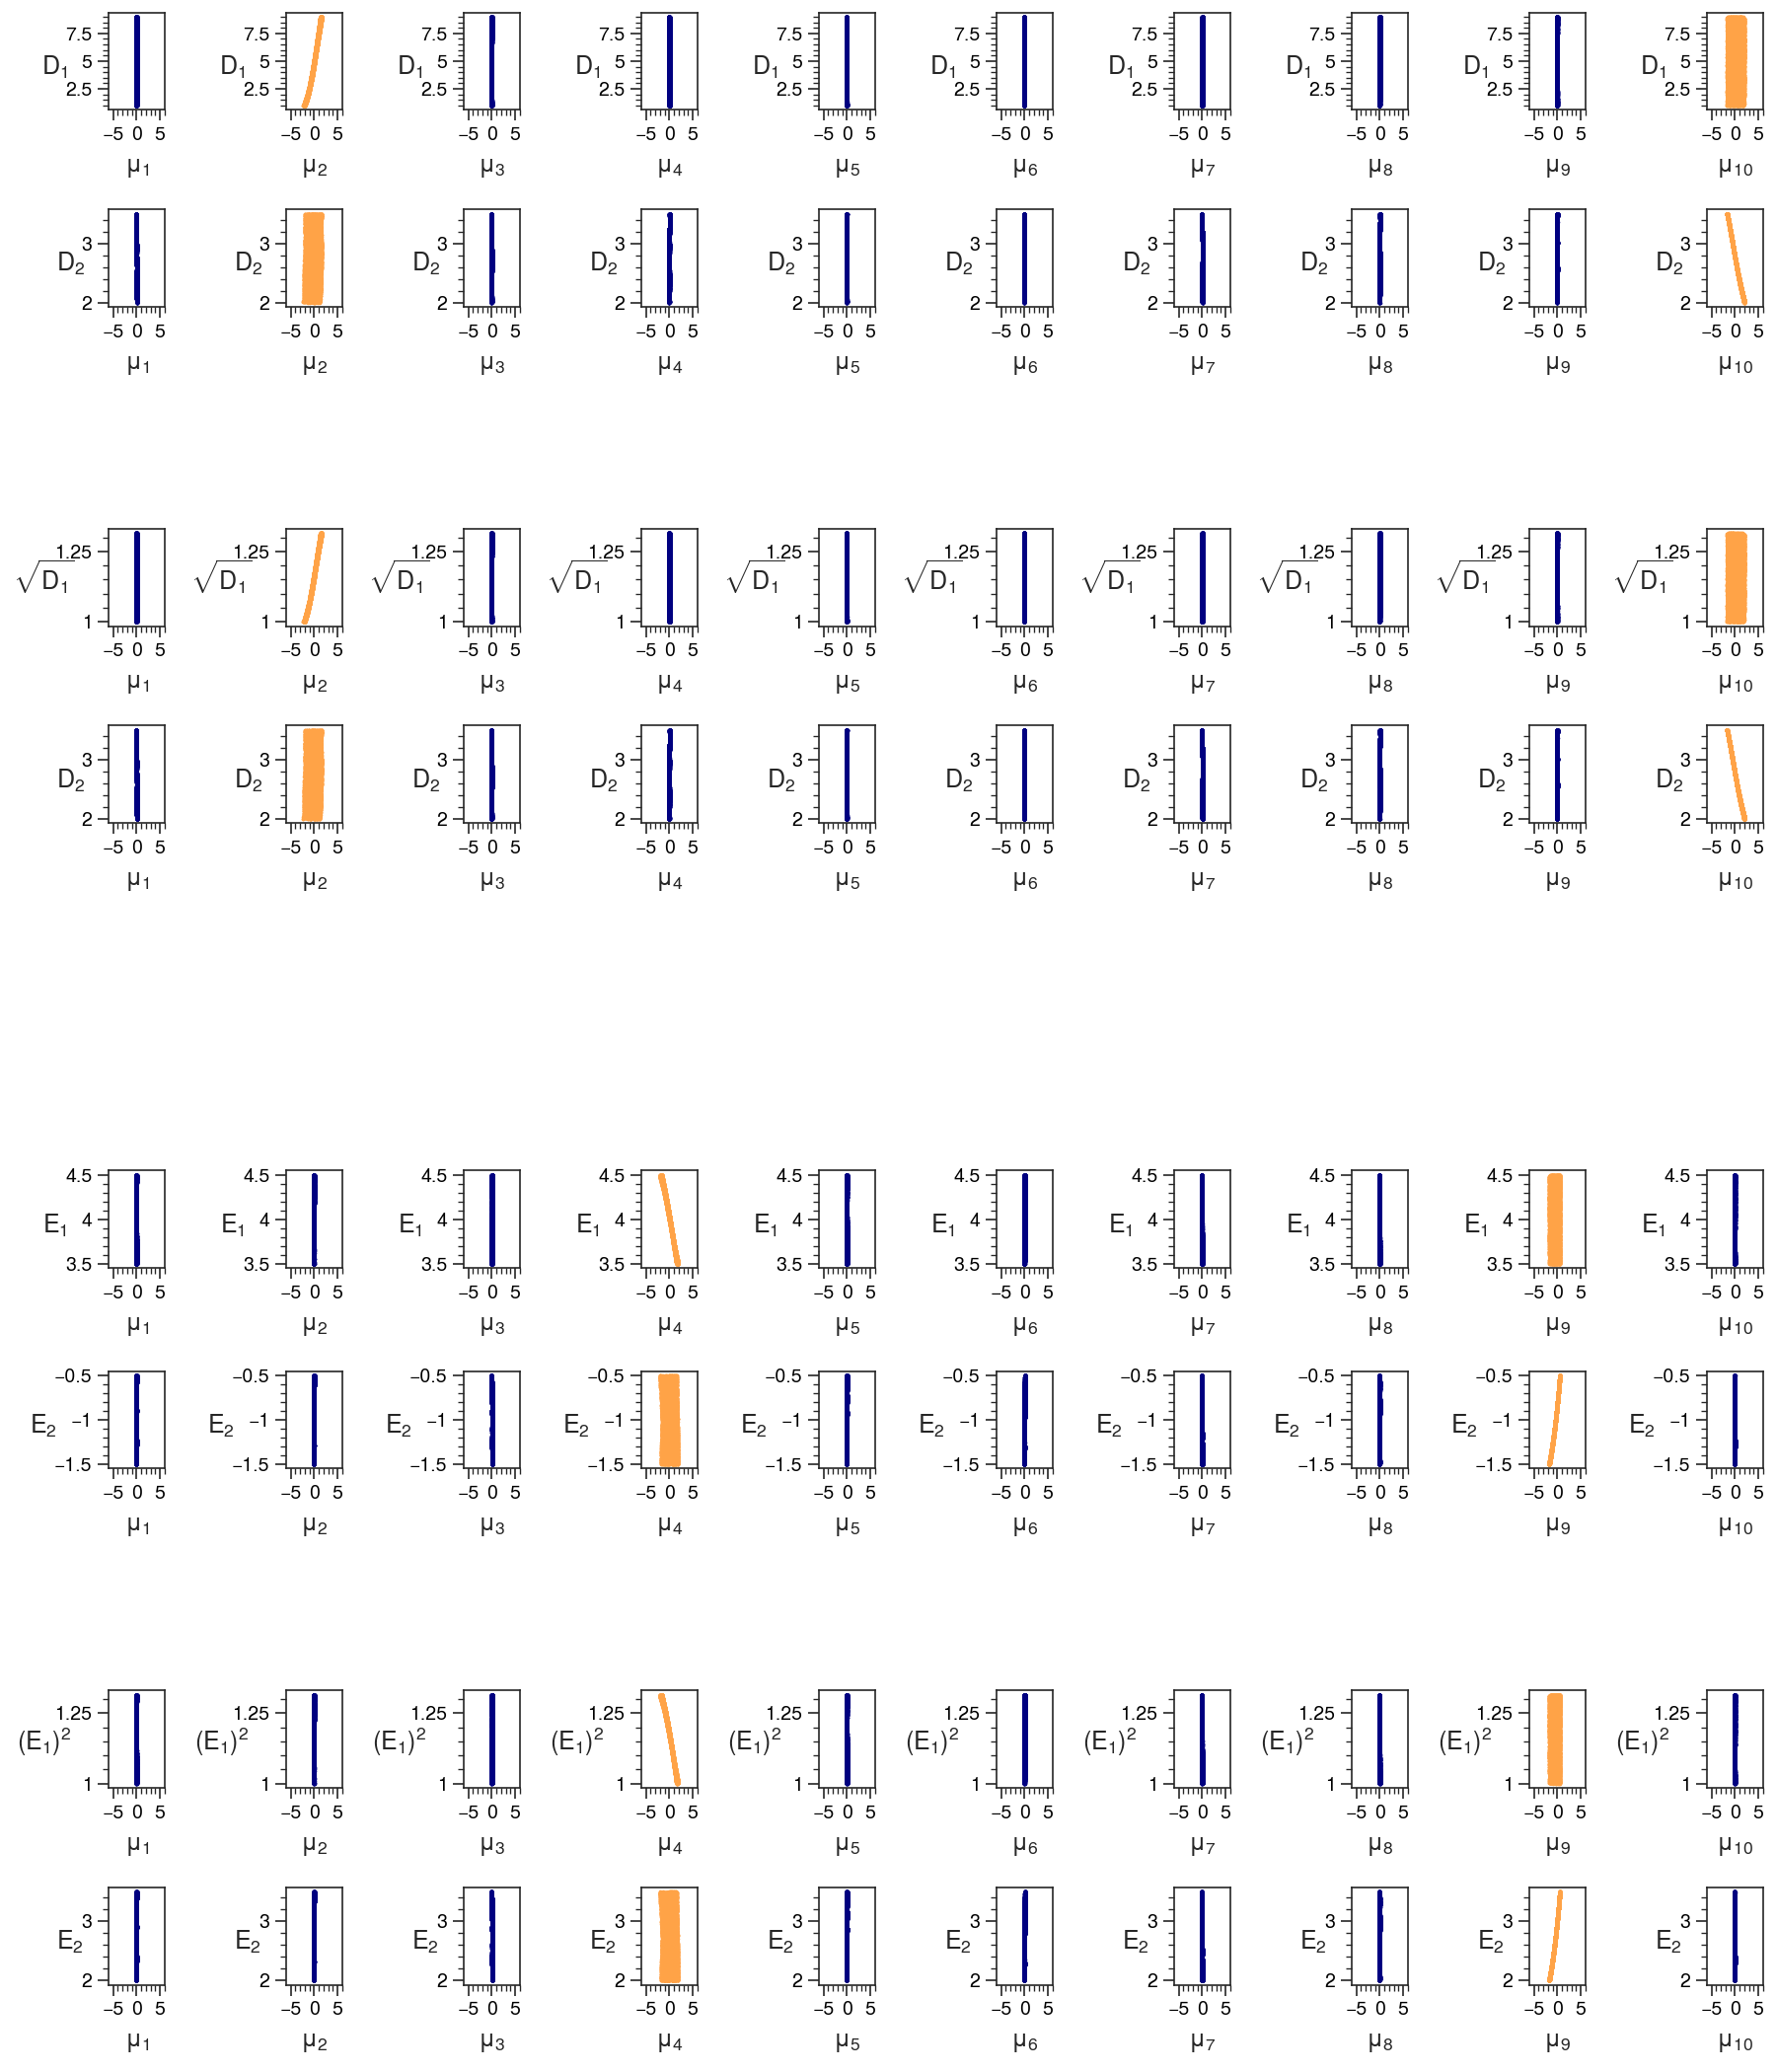

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import proplot

fontsize = 9
color_1 = RGB_color_list[0]
color_2 = RGB_color_list[3]

fig, axs = proplot.subplots(
        [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
         [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
         [21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
         [31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 
         [41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
         [51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
         [61, 62, 63, 64, 65, 66, 67, 68, 69, 70],
         [71, 72, 73, 74, 75, 76, 77, 78, 79, 80],
         [81, 82, 83, 84, 85, 86, 87, 88, 89, 90],
         [91, 92, 93, 94, 95, 96, 97, 98, 99, 100],
         [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
         [111, 112, 113, 114, 115, 116, 117, 118, 119, 120]
         ], sharex=False, sharey=False, figsize=(9, 10.5) # 3.5
    ); # the array provides a picture with 1 pixel is first ax etc...

axs.format(abc=False, #abcloc='ul',
        titleweight='bold',
        titleloc='uc', fontsize=7);

# For D1 and D2
# for D1
for i in range(10):
  if i in [2-1, 10-1]:
    axs[i].scatter(x=mean_D1_D2[:, i], y=D1, marker='.', s=2, color=color_2)
  else:
    axs[i].scatter(x=mean_D1_D2[:, i], y=D1, marker='.', s=2, color=color_1)
  axs[i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[i].set_ylabel(r"$D_1$", fontsize=fontsize, rotation='horizontal', y=0.30)

# for D2
for i in range(10):
  ax_i = i + 10
  if i in [2-1, 10-1]:
    axs[ax_i].scatter(x=mean_D1_D2[:, i], y=D2, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_D1_D2[:, i], y=D2, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$D_2$", fontsize=fontsize, rotation='horizontal', y=0.30)

# Compute Activated Units (AU) using cov(mu) for good correlation
active_dims = 0
treshold = 0.01
print("For D1 and D2:")
for i in range(10):
  cov_mu = np.cov(mean_D1_D2[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!\n")

# hide intermediate axis
for j in range(20, 30):
  axs[j].axis('off')

# For f and A
# for A = np.sqrt(D_1) 
for i in range(10):
  ax_i = i + 30
  if i in [2-1, 10-1]:
    axs[ax_i].scatter(x=mean_D1_D2[:, i], y=A, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_D1_D2[:, i], y=A, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\sqrt{D_1}$", fontsize=fontsize, rotation='horizontal', y=0.30, x=-1.2)

# for f = D_2
for i in range(10):
  ax_i = i + 40
  if i in [2-1, 10-1]:
    axs[ax_i].scatter(x=mean_D1_D2[:, i], y=f, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_D1_D2[:, i], y=f, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$D_2$", fontsize=fontsize, rotation='horizontal', y=0.30, x=-1.2)

print(f"Correlations of D: ")
for i in [1]:
    corr, p = pearsonr(mean_D1_D2[:, i], D1)
    print(f"Pearson correlation dimension {i+1} and D1: {corr:.3f} (p-value {p:.3f})")  
    corr, p = pearsonr(mean_D1_D2[:, i], A)
    print(f"Pearson correlation dimension {i+1} and A = sqrt(D1): {corr:.3f} (p-value {p:.3f})\n")

# For E1 and E2

# hide intermediate axis
for j in range(50, 70):
  axs[j].axis('off')

# for E1
for i in range(10):
  ax_i = i + 70
  if i in [4-1, 9-1]:
    axs[ax_i].scatter(x=mean_E1_E2[:, i], y=C1, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_E1_E2[:, i], y=C1, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$E_1$", fontsize=fontsize, rotation='horizontal', y=0.30)

# for E2
for i in range(10):
  ax_i = i + 80
  if i in [4-1, 9-1]:
    axs[ax_i].scatter(x=mean_E1_E2[:, i], y=C2, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_E1_E2[:, i], y=C2, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$E_2$", fontsize=fontsize, rotation='horizontal', y=0.30)

# Compute Activated Units (AU) using cov(mu) for good correlation
active_dims = 0
treshold = 0.01
print("For E1 and E2:")
for i in range(10):
  cov_mu = np.cov(mean_E1_E2[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!\n")

# hide intermediate axis
for j in range(90, 100):
  axs[j].axis('off')

# For f and A
# for A = E_1**2
for i in range(10):
  ax_i = i + 100
  if i in [4-1, 9-1]:
    axs[ax_i].scatter(x=mean_E1_E2[:, i], y=A, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_E1_E2[:, i], y=A, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$(E_1)^2$", fontsize=fontsize, rotation='horizontal', y=0.30, x=-1.2)

# for f = E_2
for i in range(10):
  ax_i = i + 110
  if i in [4-1, 9-1]:
    axs[ax_i].scatter(x=mean_E1_E2[:, i], y=f, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_E1_E2[:, i], y=f, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$E_2$", fontsize=fontsize, rotation='horizontal', y=0.30, x=-1.2)

print(f"Correlations of E: ")
for i in [3]:
    corr, p = pearsonr(mean_E1_E2[:, i], A)
    print(f"Pearson correlation dimension {i+1} and E1: {corr:.3f} (p-value {p:.3f})")  
    corr, p = pearsonr(mean_E1_E2[:, i], E1)
    print(f"Pearson correlation dimension {i+1} and A = (E1)^2: {corr:.3f} (p-value {p:.3f})\n")

savename = 'figure_6.png'
plt.savefig(path_paper + 'figs/' + savename)

## Supplemental 1

In [ ]:
# Latent space for Af
# load in data
import numpy as np

# good correlation for f: random 5 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 random 0.005/"
correlation_Af_good = np.load(path_af + "gifs/" + experiment_path + "correlation_random_output_nodes=2.npy")
print(f"Shape: correlation_Af_good: {correlation_Af_good.shape}")
f_good = correlation_Af_good[:, 0]
A_good = correlation_Af_good[:, 1]
mean_good = correlation_Af_good[:, 2:]
print(f"Shape f_good: {f_good.shape}")
print(f"Shape A_good: {A_good.shape}")
print(f"Shape mean_good: {mean_good.shape}")

# bad correlation for f: fixed 25 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 fixed points/"
correlation_Af_bad = np.load(path_af + "gifs/" + experiment_path + "correlation_fixed_output_nodes=25.npy")
print(f"\nShape: correlation_Af_bad: {correlation_Af_bad.shape}")
f_bad = correlation_Af_bad[:, 0]
A_bad = correlation_Af_bad[:, 1]
mean_bad = correlation_Af_bad[:, 2:]
print(f"Shape f_bad: {f_bad.shape}")
print(f"Shape A_bad: {A_bad.shape}")
print(f"Shape mean_bad: {mean_bad.shape}")

Shape: correlation_Af_good: (10000, 12)
Shape f_good: (10000,)
Shape A_good: (10000,)
Shape mean_good: (10000, 10)

Shape: correlation_Af_bad: (10000, 12)
Shape f_bad: (10000,)
Shape A_bad: (10000,)
Shape mean_bad: (10000, 10)


Good correlation:
Latent dimension 1 is active!
Latent dimension 6 is active!
There are 2 active latent dimensions!

Bad correlation: 
Latent dimension 5 is active!
Latent dimension 6 is active!
Latent dimension 8 is active!
Latent dimension 9 is active!
There are 4 active latent dimensions!


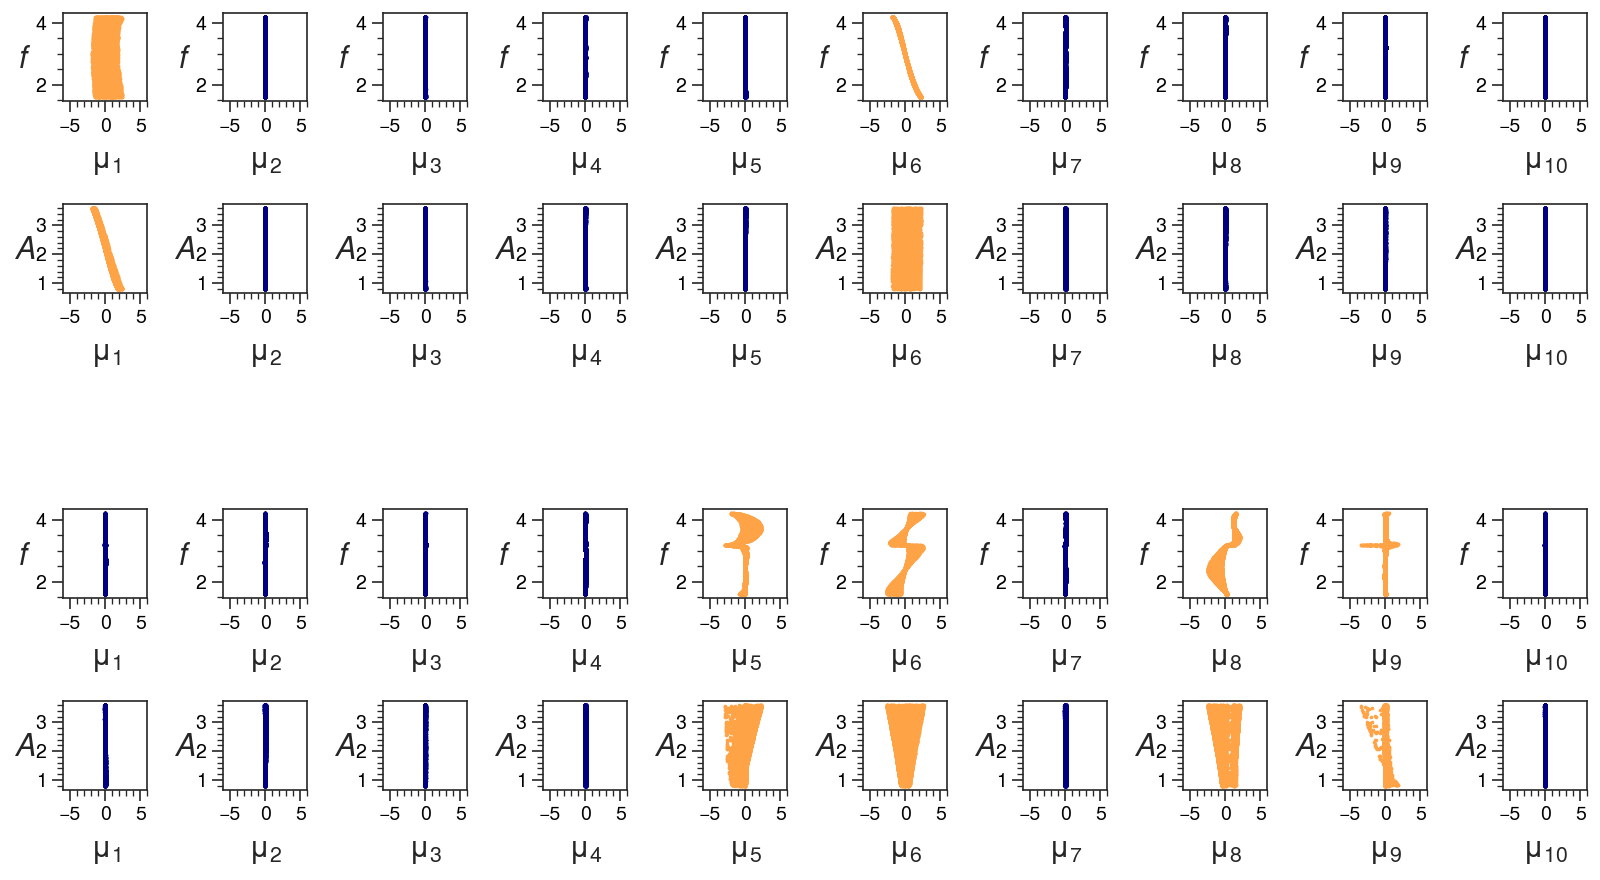

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import proplot

fontsize = 11
color_1 = RGB_color_list[0]
color_2 = RGB_color_list[3]

fig, axs = proplot.subplots(
        [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
         [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
         [21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
         [31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 
         [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]], sharex=False, sharey=False, figsize=(8, 4.4) # 3.5
    ); # the array provides a picture with 1 pixel is first ax etc...

axs.format(abc=False, #abcloc='ul',
        titleweight='bold',
        titleloc='uc', fontsize=7);

# Good correlation
# for f
for i in range(10):
  if i in [1-1, 6-1]:
    axs[i].scatter(x=mean_good[:, i], y=f_good, marker='.', s=2, color=color_2)
  else:
    axs[i].scatter(x=mean_good[:, i], y=f_good, marker='.', s=2, color=color_1)
  axs[i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[i].set_ylabel(r"$\mathit{f}$", fontsize=fontsize, rotation='horizontal', y=0.30)

# for A
for i in range(10):
  ax_i = i + 10
  if i in [1-1, 6-1]:
    axs[ax_i].scatter(x=mean_good[:, i], y=A_good, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_good[:, i], y=A_good, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\mathit{A}$", fontsize=fontsize, rotation='horizontal', y=0.30)

# Compute Activated Units (AU) using cov(mu) for good correlation
active_dims = 0
treshold = 0.01
print("Good correlation:")
for i in range(10):
  cov_mu = np.cov(mean_good[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!")

# hide intermediate axis
for j in range(20, 30):
  axs[j].axis('off')

# Bad correlation
# for f
for i in range(10):
  ax_i = i + 30
  if i in [5-1, 6-1, 8-1, 9-1]:
    axs[ax_i].scatter(x=mean_bad[:, i], y=f_bad, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_bad[:, i], y=f_bad, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\mathit{f}$", fontsize=fontsize, rotation='horizontal', y=0.30)

# for A
for i in range(10):
  ax_i = i + 40
  if i in [5-1, 6-1, 8-1, 9-1]:
    axs[ax_i].scatter(x=mean_bad[:, i], y=A_bad, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_bad[:, i], y=A_bad, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-6, 6])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\mathit{A}$", fontsize=fontsize, rotation='horizontal', y=0.30, x=-0.4)

# Compute Activated Units (AU) using cov(mu) for bad correlation
active_dims = 0
treshold = 0.01
print("\nBad correlation: ")
for i in range(10):
  cov_mu = np.cov(mean_bad[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!")

savename = 'supplemental_1.png'
plt.savefig(path_paper + 'figs/' + savename)

## Supplemental 2

In [ ]:
# Latent space for oscillator
# load in data
import numpy as np

# good correlation for f: random 5 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 random/"
correlation_osc_good = np.load(path_osc + "correlation_random_output_nodes=1.npy")
print(f"Shape: correlation_osc_good: {correlation_osc_good.shape}")
k_good = correlation_osc_good[:, 0]
b_good = correlation_osc_good[:, 1]
mean_good = correlation_osc_good[:, 2:]
print(f"Shape k_good: {k_good.shape}")
print(f"Shape b_good: {b_good.shape}")
print(f"Shape mean_good: {mean_good.shape}")

# bad correlation for f: fixed 25 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 fixed points/"
correlation_osc_bad = np.load(path_osc + "correlation_fixed_output_nodes=5.npy")
print(f"\nShape: correlation_osc_bad: {correlation_osc_bad.shape}")
k_bad = correlation_osc_bad[:, 0]
b_bad = correlation_osc_bad[:, 1]
mean_bad = correlation_osc_bad[:, 2:]
print(f"Shape k_bad: {k_bad.shape}")
print(f"Shape b_bad: {b_bad.shape}")
print(f"Shape mean_bad: {mean_bad.shape}")

Shape: correlation_osc_good: (95000, 12)
Shape k_good: (95000,)
Shape b_good: (95000,)
Shape mean_good: (95000, 10)

Shape: correlation_osc_bad: (95000, 12)
Shape k_bad: (95000,)
Shape b_bad: (95000,)
Shape mean_bad: (95000, 10)


Good correlation:
Latent dimension 1 is active!
Latent dimension 3 is active!
There are 2 active latent dimensions!

Bad correlation: 
Latent dimension 1 is active!
Latent dimension 5 is active!
There are 2 active latent dimensions!


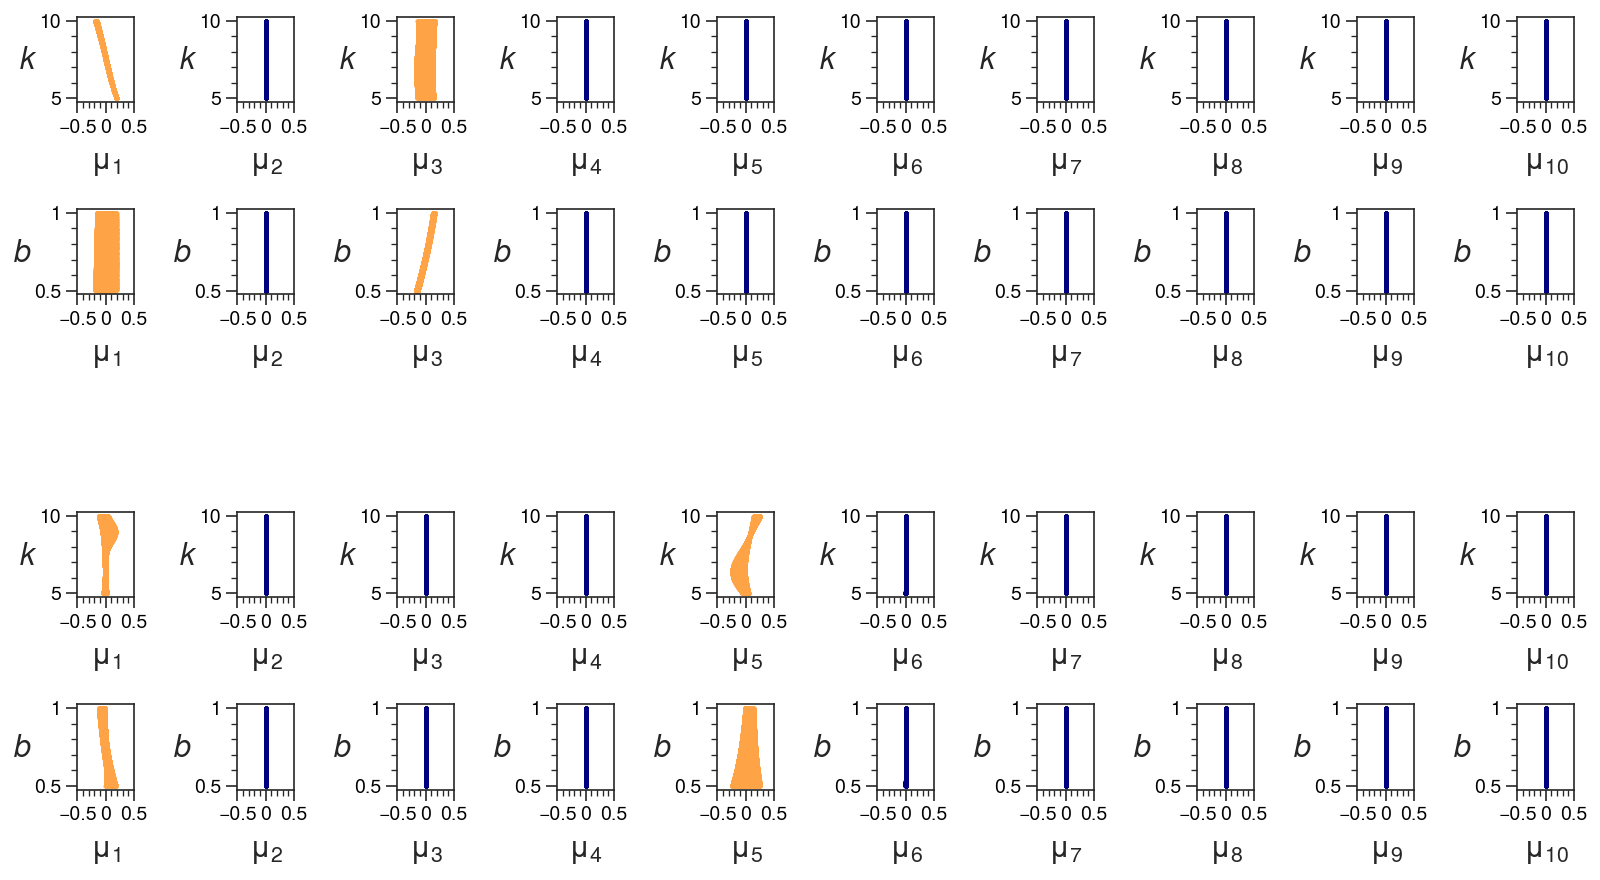

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import proplot

fontsize = 11
color_1 = RGB_color_list[0]
color_2 = RGB_color_list[3]

fig, axs = proplot.subplots(
        [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
         [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
         [21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
         [31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 
         [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]], sharex=False, sharey=False, figsize=(8, 4.4) # 3.5
    ); # the array provides a picture with 1 pixel is first ax etc...

axs.format(abc=False, #abcloc='ul',
        titleweight='bold',
        titleloc='uc', fontsize=7);

# Good correlation
# for k
for i in range(10):
  if i in [1-1, 3-1]:
    axs[i].scatter(x=mean_good[:, i], y=k_good, marker='.', s=2, color=color_2)
  else:
    axs[i].scatter(x=mean_good[:, i], y=k_good, marker='.', s=2, color=color_1)
  axs[i].set_xlim([-0.5, 0.5])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[i].set_ylabel(r"$\mathit{k}$", fontsize=fontsize, rotation='horizontal', y=0.30)

# for b
for i in range(10):
  ax_i = i + 10
  if i in [1-1, 3-1]:
    axs[ax_i].scatter(x=mean_good[:, i], y=b_good, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_good[:, i], y=b_good, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-0.5, 0.5])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\mathit{b}$", fontsize=fontsize, rotation='horizontal', y=0.30)

# Compute Activated Units (AU) using cov(mu) for good correlation
active_dims = 0
treshold = 0.001
print("Good correlation:")
for i in range(10):
  cov_mu = np.cov(mean_good[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!")

# hide intermediate axis
for j in range(20, 30):
  axs[j].axis('off')

# Bad correlation
# for k
for i in range(10):
  ax_i = i + 30
  if i in [1-1, 5-1]:
    axs[ax_i].scatter(x=mean_bad[:, i], y=k_bad, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_bad[:, i], y=k_bad, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-0.5, 0.5])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\mathit{k}$", fontsize=fontsize, rotation='horizontal', y=0.30)

# for b
for i in range(10):
  ax_i = i + 40
  if i in [1-1, 5-1]:
    axs[ax_i].scatter(x=mean_bad[:, i], y=b_bad, marker='.', s=2, color=color_2)
  else:
    axs[ax_i].scatter(x=mean_bad[:, i], y=b_bad, marker='.', s=2, color=color_1)
  axs[ax_i].set_xlim([-0.5, 0.5])

  # To get 10 in underscore
  if (i + 1) != 10:
    axs[ax_i].set_xlabel(f"$\mu_{i+1}$", fontsize=fontsize)
  elif (i+1) == 10:
    axs[ax_i].set_xlabel(r"$\mu_{10}$", fontsize=fontsize)

  axs[ax_i].set_ylabel(r"$\mathit{b}$", fontsize=fontsize, rotation='horizontal', y=0.30, x=-0.4)

# Compute Activated Units (AU) using cov(mu) for bad correlation
active_dims = 0
treshold = 0.001
print("\nBad correlation: ")
for i in range(10):
  cov_mu = np.cov(mean_bad[:, i])
  if cov_mu > treshold:
    print(f"Latent dimension {i+1} is active!")
    active_dims += 1
print(f"There are {active_dims} active latent dimensions!")

savename = 'supplemental_2.png'
plt.savefig(path_paper + 'figs/' + savename)

## Supplemental 3

In [ ]:
# load in data
import numpy as np

# good correlation for f: random 5 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 random/"
correlation_f_good = np.load(path + "gifs/" + experiment_path + "correlation_random_output_nodes=5.npy")
print(f"Shape: correlation_f_good: {correlation_f_good.shape}")
f_good = correlation_f_good[:, 0]
mean_good = correlation_f_good[:, 1:]
print(f"Shape f_good: {f_good.shape}")
print(f"Shape mean_good: {mean_good.shape}")

# bad correlation for f: fixed 25 output nodes
experiment_path = "x output nodes 2pi batch 250 100000 samples 235 fixed points/"
correlation_f_bad = np.load(path + "gifs/" + experiment_path + "correlation_fixed_output_nodes=25.npy")
print(f"\nShape: correlation_f_bad: {correlation_f_bad.shape}")
f_bad = correlation_f_bad[:, 0]
mean_bad = correlation_f_bad[:, 1:]
print(f"Shape f_bad: {f_bad.shape}")
print(f"Shape mean_bad: {mean_bad.shape}")

Shape: correlation_f_good: (10000, 11)
Shape f_good: (10000,)
Shape mean_good: (10000, 10)

Shape: correlation_f_bad: (10000, 11)
Shape f_bad: (10000,)
Shape mean_bad: (10000, 10)


In [ ]:
f_bad = correlation_f_bad[:, 0]
mean_bad = correlation_f_bad[:, 1:]

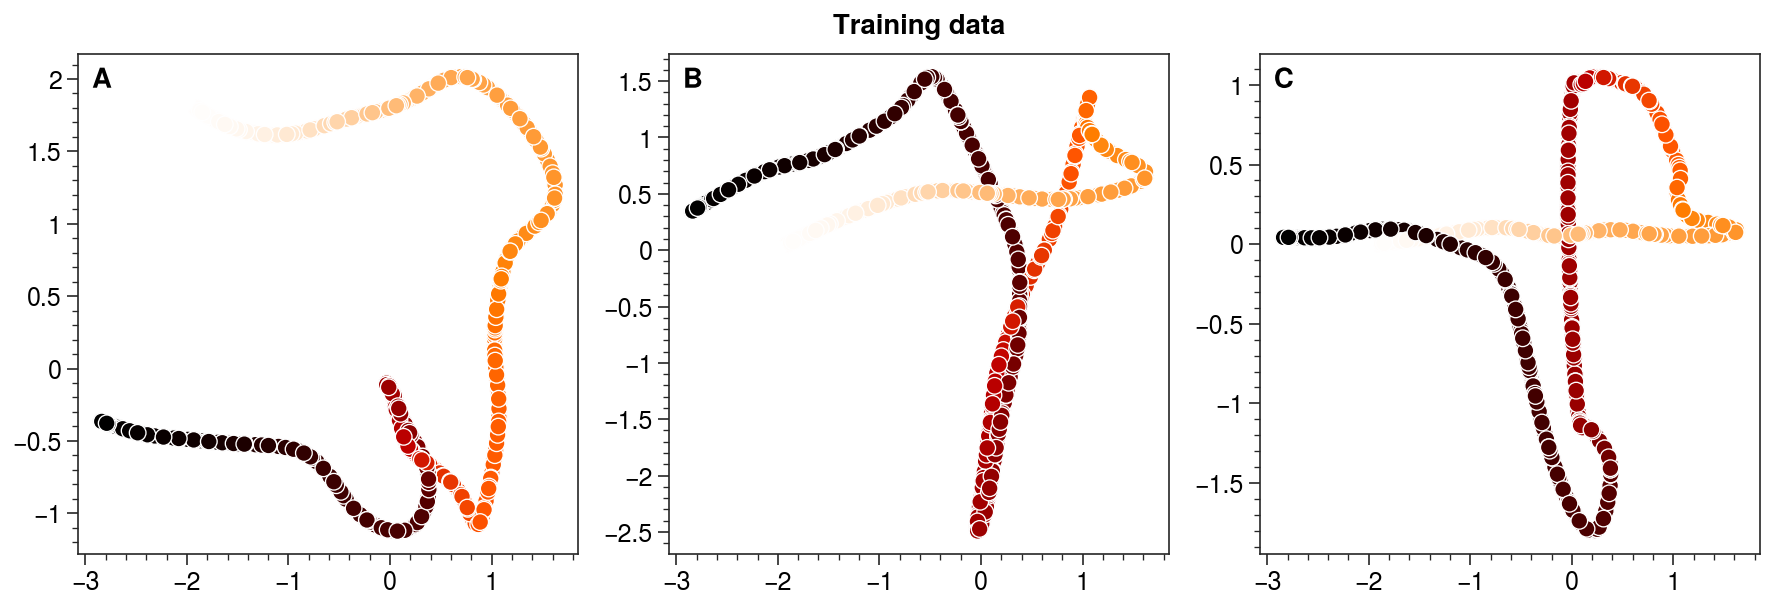

In [ ]:
fig, axs = proplot.subplots(
        [[1, 2, 3]], sharex=False, sharey=False, 
    ); # the array provides a picture with 1 pixel is first ax etc...

#general formatting for all axes
axs.format(abc='A', abcloc='ul',
        titleweight='bold',
        titleloc='uc', 
        suptitle='Training data', fontfamily='sans-serif');

sns.scatterplot(x=mean_bad[:, 4], y=mean_bad[:, 5], c=f_bad, cmap="gist_heat",  ax=axs[0]);
sns.scatterplot(x=mean_bad[:, 4], y=mean_bad[:, 6], c=f_bad, cmap="gist_heat",  ax=axs[1]);
sns.scatterplot(x=mean_bad[:, 4], y=mean_bad[:, 7], c=f_bad, cmap="gist_heat",  ax=axs[2]);

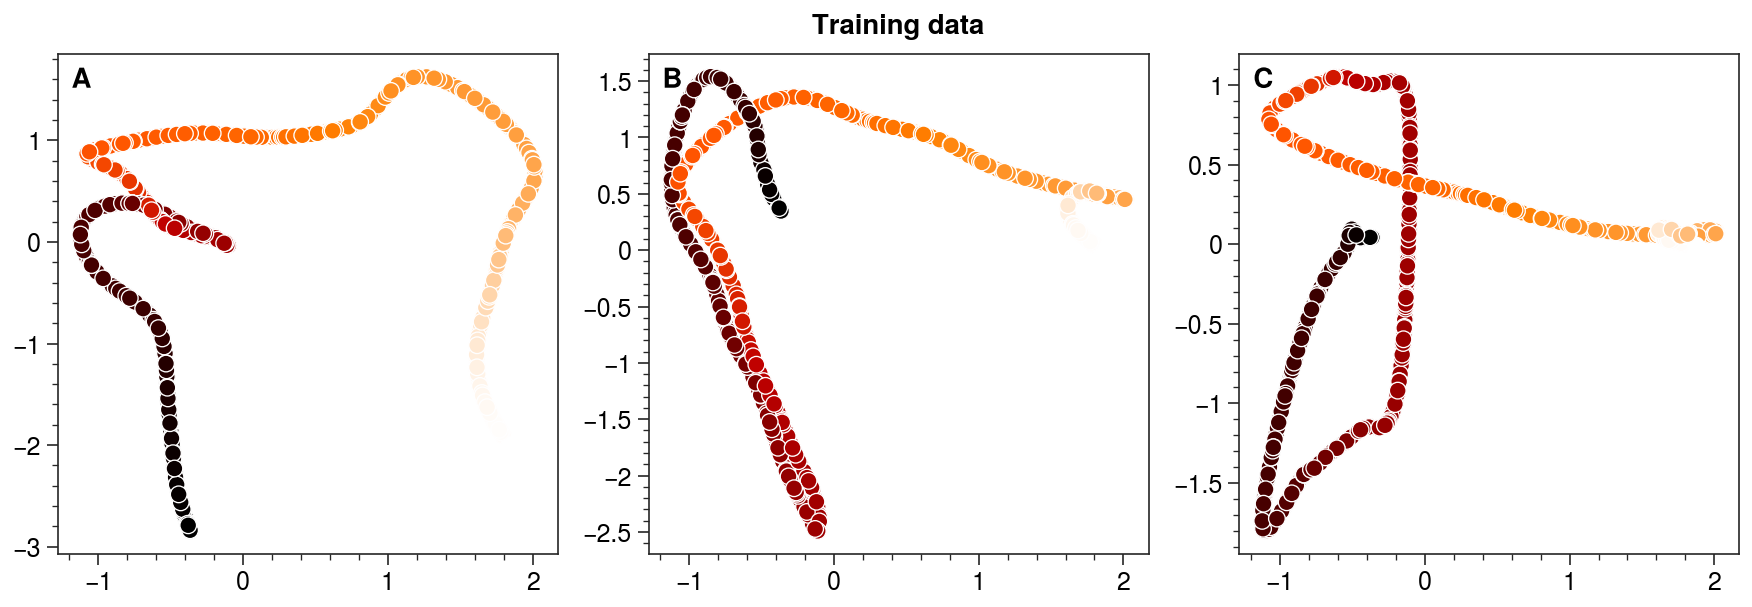

In [ ]:
fig, axs = proplot.subplots(
        [[1, 2, 3]], sharex=False, sharey=False, 
    ); # the array provides a picture with 1 pixel is first ax etc...

#general formatting for all axes
axs.format(abc='A', abcloc='ul',
        titleweight='bold',
        titleloc='uc', 
        suptitle='Training data', fontfamily='sans-serif');

sns.scatterplot(x=mean_bad[:, 5], y=mean_bad[:, 4], c=f_bad, cmap="gist_heat",  ax=axs[0]);
sns.scatterplot(x=mean_bad[:, 5], y=mean_bad[:, 6], c=f_bad, cmap="gist_heat",  ax=axs[1]);
sns.scatterplot(x=mean_bad[:, 5], y=mean_bad[:, 7], c=f_bad, cmap="gist_heat",  ax=axs[2]);

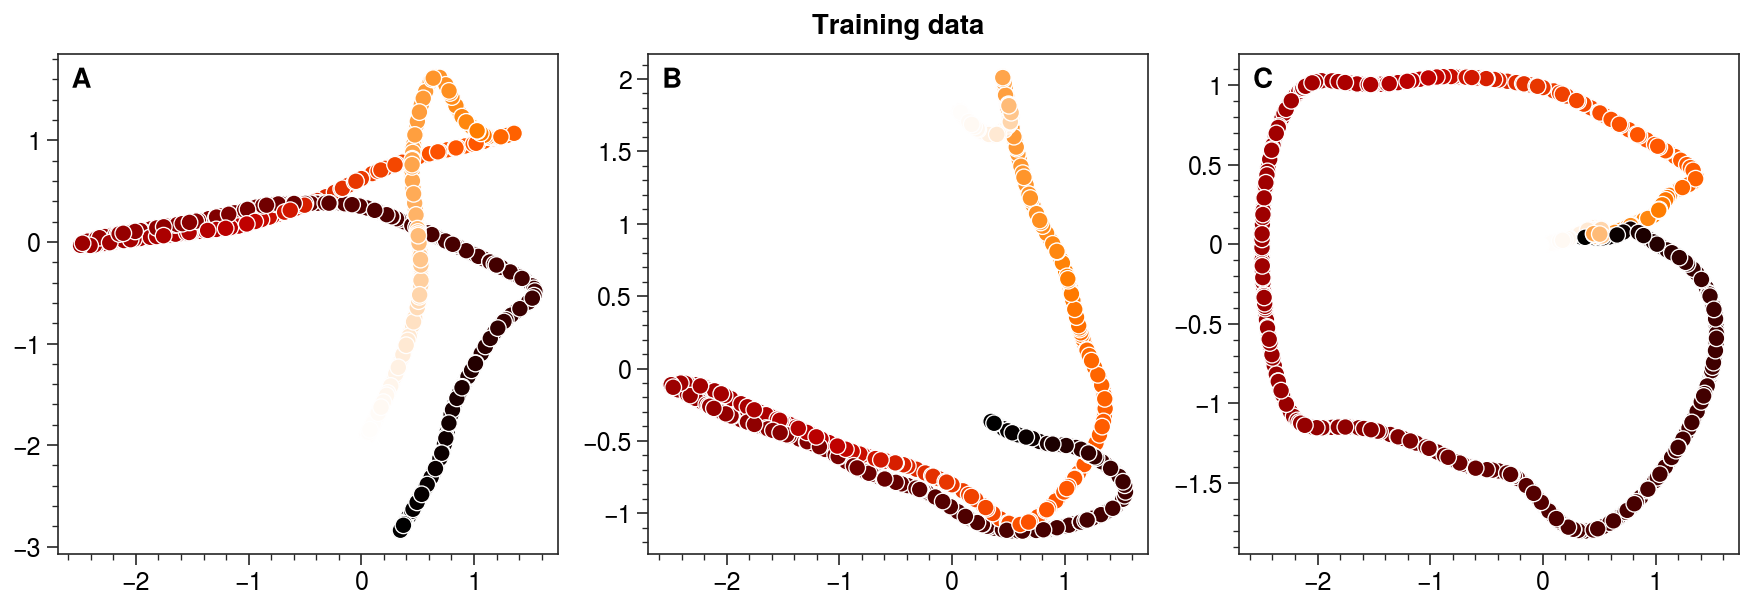

In [ ]:
fig, axs = proplot.subplots(
        [[1, 2, 3]], sharex=False, sharey=False, 
    ); # the array provides a picture with 1 pixel is first ax etc...

#general formatting for all axes
axs.format(abc='A', abcloc='ul',
        titleweight='bold',
        titleloc='uc', 
        suptitle='Training data', fontfamily='sans-serif');

sns.scatterplot(x=mean_bad[:, 6], y=mean_bad[:, 4], c=f_bad, cmap="gist_heat",  ax=axs[0]);
sns.scatterplot(x=mean_bad[:, 6], y=mean_bad[:, 5], c=f_bad, cmap="gist_heat",  ax=axs[1]);
sns.scatterplot(x=mean_bad[:, 6], y=mean_bad[:, 7], c=f_bad, cmap="gist_heat",  ax=axs[2]);

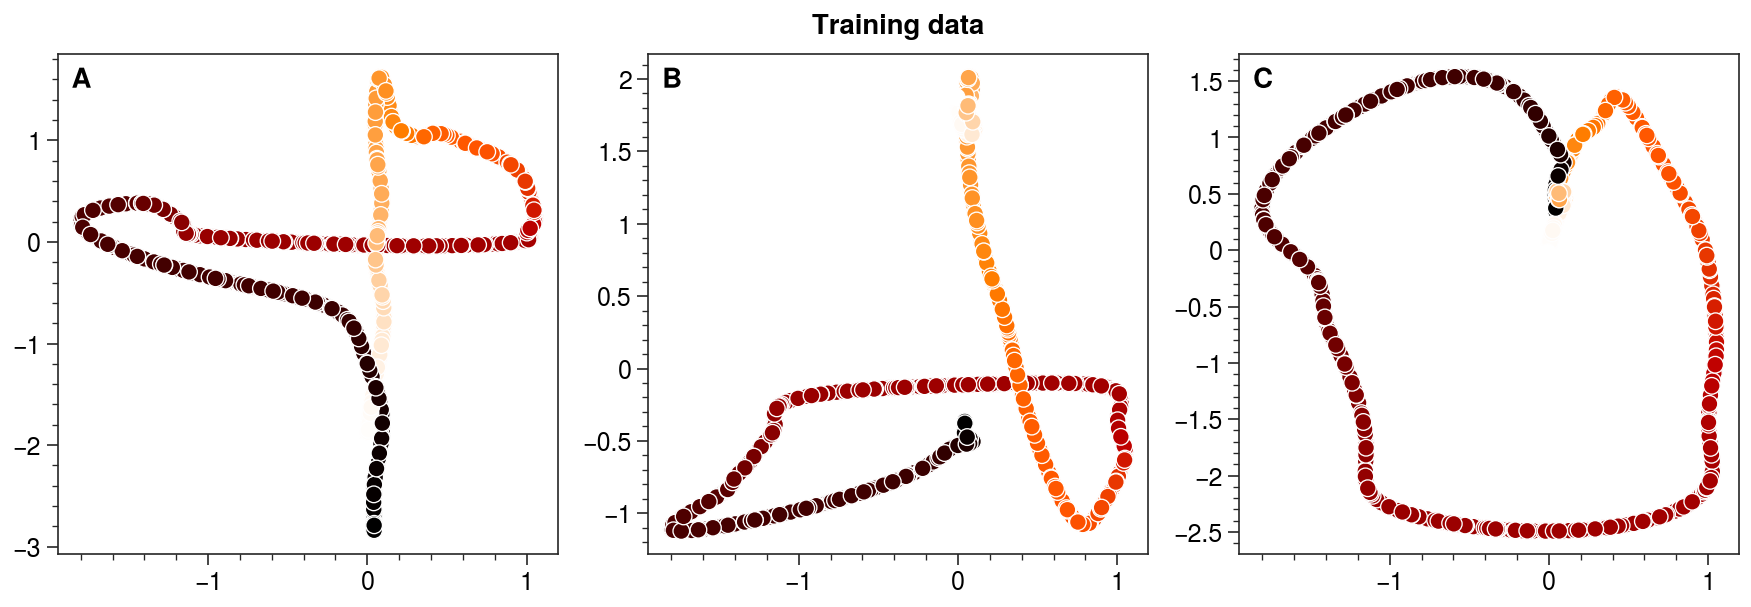

In [ ]:
fig, axs = proplot.subplots(
        [[1, 2, 3]], sharex=False, sharey=False, 
    ); # the array provides a picture with 1 pixel is first ax etc...

#general formatting for all axes
axs.format(abc='A', abcloc='ul',
        titleweight='bold',
        titleloc='uc', 
        suptitle='Training data', fontfamily='sans-serif');

sns.scatterplot(x=mean_bad[:, 7], y=mean_bad[:, 4], c=f_bad, cmap="gist_heat",  ax=axs[0]);
sns.scatterplot(x=mean_bad[:, 7], y=mean_bad[:, 5], c=f_bad, cmap="gist_heat",  ax=axs[1]);
sns.scatterplot(x=mean_bad[:, 7], y=mean_bad[:, 6], c=f_bad, cmap="gist_heat",  ax=axs[2]);

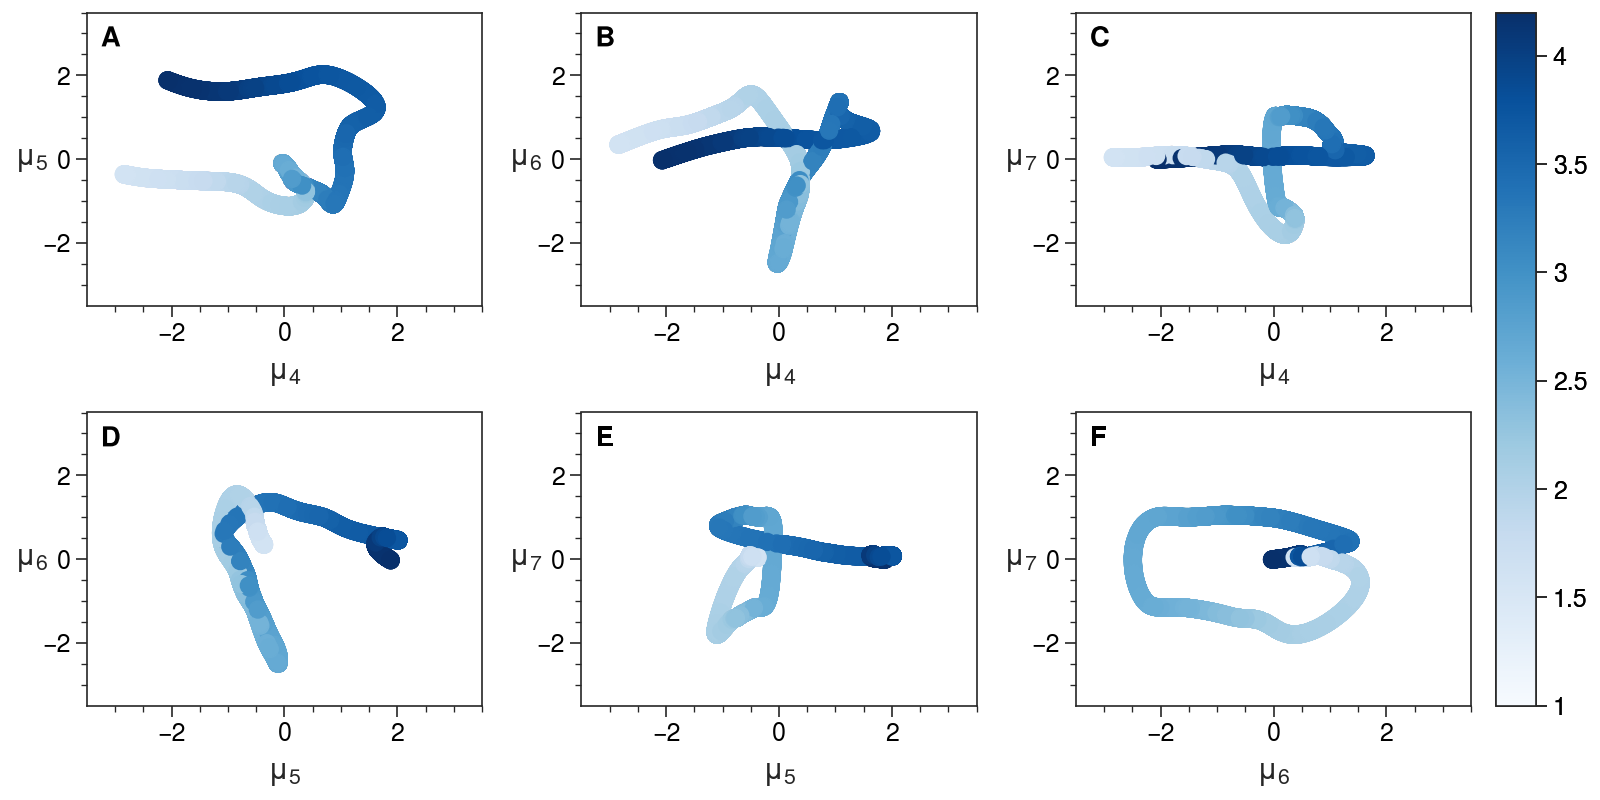

In [ ]:
fontsize=11

fig, axs = proplot.subplots(
        [[1, 2, 3], 
         [4, 5, 6]], sharex=False, sharey=False, figsize=(8, 4)
    ); # the array provides a picture with 1 pixel is first ax etc...

#general formatting for all axes
axs.format(abc='A', abcloc='ul',
        titleweight='bold',
        titleloc='uc', 
        fontfamily='sans-serif');

for i, dim in enumerate([(4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7)]):
  cm = axs[i].scatter(x=mean_bad[:, dim[0]], y=mean_bad[:, dim[1]], c=f_bad, cmap='Blues', vmin=1);
  #axs[i].colorbar(cm)
  axs[i].set_xlabel(f"$\mu_{dim[0]}$", fontsize=fontsize)
  axs[i].set_ylabel(f"$\mu_{dim[1]}$", fontsize=fontsize, rotation='horizontal', y=0.45)
  axs[i].set_xlim([-3.5, 3.5])
  axs[i].set_ylim([-3.5, 3.5])

fig.colorbar(cm)

savename = 'supplemental_3.png'
plt.savefig(path_paper + 'figs/' + savename)